<h1 style="color: #001a79;"> Wisconsin Breast Cancer Analysis Notebook</h1>

<h3 style="color: #001a79;">For this notebook you will need the following packages:</h3>

In [153]:
# numpy offers useful arrays and random number generators. 
import numpy as np

# pandas is good for data manipulation and analysis. 
import pandas as pd

# matplotlib is a plotting library, and pyplot is its easy-to-use module.
import matplotlib.pyplot as plt

# seaborn is a fancier plotting library. 
import seaborn as sns

# Mains statistics package.
import scipy.stats as ss

<h2 style="color: #001a79;">Introduction</h2>

<hr style="border-top: 1px solid #001a79;" />

Breast cancer is a common cancer in Ireland with more than 3,500 women and approximately 35 men  diagnosed with breast cancer each year. Breast cancer is when cells in the breast grow and divide in an uncontrolled way. This creates a mass of tissue called a tumor. Signs of breast cancer can include feeling a lump in the breast, a change in the size of the breast and changes to the skin of the breasts. Breast cancer is treated with surgery, radiotherapy, chemotherapy, hormone therapy and targeted therapies, depending on the type.

<img src="content/breast-cancer.jpg" alt="Breast cancer" style="width: 350px;"/> 

Sources:<br>
<a href="https://www.cancer.ie/cancer-information-and-support/cancer-types/breast-cancer#:~:text=Each%20year%20in%20Ireland%2C%20more,therapies%2C%20depending%20on%20the%20type." target="_blank">Irish Cancer Society: Breast Cancer</a><br>
<a href="https://my.clevelandclinic.org/health/diseases/3986-breast-cancer" target="_blank">Cleveland Clinic: Breast Cancer</a>

The <a href="https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29" target="_blank">Wisconsin-Breast Cancer (Diagnostics) dataset</a> (WBC) from UCI machine learning repository is a classification dataset that records the measurements for breast cancer cases. There are two classes of diagnosis Benign and Malignant:

<table style="border-collapse: collapse; width: 80%; height: 261px;" border="1">
<tbody>
<tr>
<td style="width: 50%; text-align: center;">
<h2><strong>1. Benign</strong></h2>
</td>
<td style="width: 50%; text-align: center;">
<h2><strong>2. Malignant</strong></h2>
</td>
</tr>
<tr>
<td style="width: 50%; text-align: center;">
<h3>Grow slowly and have distant borders.</h3>
</td>
<td style="width: 50%; text-align: center;">
<h3>Can grow quickly and have irregular borders.</h3>
</td>
</tr>
<tr>
<td style="width: 50%; text-align: center;">
<h3>Do not invade surrounding tissue.</h3>
</td>
<td style="width: 50%; text-align: center;">
<h3>Often invade surrounding tissue.</h3>
</td>
</tr>
<tr>
<td style="width: 50%; text-align: center;">
<h3>Do not invade other parts of the body.</h3>
</td>
<td style="width: 50%; text-align: center;">
<h3>Can spread to other parts of the body through a process called metastasis.&nbsp;</h3>
</td>
</tr>
</tbody>
</table>

<img src="content/tumortype.PNG" alt="Benign versus Malignant" style="width: 550px;"/> 

<a href="https://jamanetwork.com/journals/jamaoncology/fullarticle/2768634" target="_blank">JAMA Oncology: Benign vs Malignant Tumors</a><br>
<a href="https://www.technologynetworks.com/cancer-research/articles/benign-vs-malignant-tumors-364765" target="_blank">Technology Networks (Cancer Research): Benign vs Malignant Tumors</a>

<h2 style="color: #001a79;">Breast Cancer Wisconsin (Diagnostic) Dataset</h2>

<hr style="border-top: 1px solid #001a79;" />

### Background

The diagnosis of breast tumors has traditionally been performed by a full biopsy. This process involves the extraction of sample cells or tissues for examination to determine the presence or extent of a disease. Dr. William H. Wolberg, physician at the University Of Wisconsin Hospital used fine needle aspirations (FNAs) to extract a small amount of breast tissue or fluid from the suspicious area with a thin, hollow needle and is then checked for cancer cells. On the sample taken, Dr. Wolberg used an interactive computer system to evaluate and diagnose the sample based on cytologic features derived directly from a digital scan of the FNA slides.

The program initializes active contour models, known as snakes, near the boundaries of a set of cell nuclei. The customized snakes are deformed to the exact shape of the nuclei. This allows for precise, automated analysis of nuclear size, shape and texture using a curve-fitting algorithm. Ten such features are computed for each nucleus, and the mean value, largest (or 'worst') value and standard error of each feature are found over the range of isolated cells. 569 patients provided the data to develop this system. 

Sources:<br>
<a href="https://www.cancer.org/cancer/breast-cancer/screening-tests-and-early-detection/breast-biopsy/fine-needle-aspiration-biopsy-of-the-breast.html#:~:text=During%20a%20fine%20needle%20aspiration,needle%20biopsy%20is%20often%20preferred" target="_blank">Cancer.org: Fine Needle Aspiration (FNA) of the Breast</a><br>
<a href="https://www.sciencedirect.com/science/article/abs/pii/030438359490099X" target="_blank">William H.Wolberg - Machine learning techniques to diagnose breast cancer from image-processed nuclear features of fine needle aspirates</a>

### Importing the Data

Source: <a href="https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data" target="_blank">Kaggle: Breast Cancer Wisconsin (Diagnostic) Data Set</a>

In [154]:
# Import data
df = pd.read_csv("data.csv")

In [4]:
# Show first 5 rows 
df.tail(10)

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
559  925291         B        11.51         23.93           74.52      403.5   
560  925292         B        14.05         27.15           91.38      600.4   
561  925311         B        11.20         29.37           70.67      386.0   
562  925622         M        15.22         30.62          103.40      716.9   
563  926125         M        20.92         25.09          143.00     1347.0   
564  926424         M        21.56         22.39          142.00     1479.0   
565  926682         M        20.13         28.25          131.20     1261.0   
566  926954         M        16.60         28.08          108.30      858.1   
567  927241         M        20.60         29.33          140.10     1265.0   
568   92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
559          0.09261           0.10210         0.11120              0.04105   
560          0.09929           0.11260         0.04462              0.04304   
561          0.07449           0.03558         0.00000              0.00000   
562          0.10480           0.20870         0.25500              0.09429   
563          0.10990           0.22360         0.31740              0.14740   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
559  ...          37.16            82.28       474.2           0.12980   
560  ...          33.17           100.20       706.7           0.12410   
561  ...          38.30            75.19       439.6           0.09267   
562  ...          42.79           128.70       915.0           0.14170   
563  ...          29.41           179.10      1819.0           0.14070   
564  ...          26.40           166.10      2027.0           0.14100   
565  ...          38.25           155.00      1731.0           0.11660   
566  ...          34.12           126.70      1124.0           0.11390   
567  ...          39.42           184.60      1821.0           0.16500   
568  ...          30.37            59.16       268.6           0.08996   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
559            0.25170           0.3630               0.09653          0.2112   
560            0.22640           0.1326               0.10480          0.2250   
561            0.05494           0.0000               0.00000          0.1566   
562            0.79170           1.1700               0.23560          0.4089   
563            0.41860           0.6599               0.25420          0.2929   
564            0.21130           0.4107               0.22160          0.2060   
565            0.19220           0.3215               0.16280          0.2572   
566            0.30940           0.3403               0.14180          0.2218   
567            0.86810           0.9387               0.26500          0.4087   
568            0.06444           0.0000               0.00000          0.2871   

     fractal_dimension_worst  Unnamed: 32  
559                  0.08732          NaN  
560                  0.08321          NaN  
561                  0.05905          NaN  
562                  0.14090          NaN  
563                  0.09873          NaN  
564                  0.07115          NaN  
565                  0.06637          NaN  
566                  0.07820          NaN  
567                  0.12400          NaN  
568                  0.07039          NaN  

[10 rows x 33 columns]

### About the Data

The data is made up of 569 rows each representing a sample. 

It's 33 columns are made up of:
1. The patient's ID and their diagnosis. These are types ints and strings respectively. 
2. Ten real-valued features that are computed for each cell nucleus:
    - **Radius** - mean of distances from center to points on the perimeter
    - **Texture** - standard deviation of gray-scale values
    - **Perimeter** 
    - **Area**
    - **Smoothness** - local variation in radius lengths
    - **Compactness** - $\frac{perimeter^2}{area - 1.0}$
    - **Concavity** - severity of concave portions of the contour
    - **Concave Points** - number of concave portions of the contour
    - **Symmetry**
    - **Fractal dimension** - coastline approximation - 1
    
For each of the 10 the mean value, extreme value and standard error of each feature are calculated. 

All feature values are floats recorded to four significant digits.

3. Missing attribute values: none. 

In [5]:
# No. of rows x No. of columns
df.shape

(569, 33)

In [6]:
# Column names 
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [7]:
# Column types 
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

### Data Cleaning 

For the analysis and machine learning we do not need the `id` and `Unnamed: 32`. 

In [8]:
# Drop columns 'id' and 'Unnamed: 32'
df.drop(columns = ['id', 'Unnamed: 32'], axis = 1, inplace = True)

# Show first 5 rows 
df.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

Check that the df has any null or missing values. 

In [9]:
# Return the sum of nulls for the df 
df.isnull().sum().sum()

0

In [10]:
# Return the sum of na for the df 
df.isna().sum().sum()

0

### Explore Data

In [11]:
diagnosis_counts = df['diagnosis'].value_counts()

In [12]:
# Benign and malignant counts 
diagnosis_counts = df['diagnosis'].value_counts()
diagnosis_counts

B    357
M    212
Name: diagnosis, dtype: int64

In [13]:
# Benign and malignant percentages 
diagnosis_percents = round((df['diagnosis'].value_counts(normalize=True)) * 100, 1)
diagnosis_percents

B    62.7
M    37.3
Name: diagnosis, dtype: float64

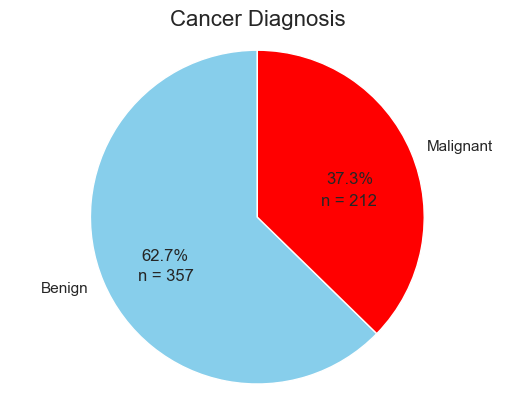

In [14]:
# Graph style
sns.set(style="darkgrid")
# Plot a pie chart Benign vs malignant diagnosis
diagnosis_cols = ['skyblue', 'red']
labels = 'Benign', 'Malignant'
fig, ax = plt.subplots()
ax.pie(diagnosis_percents, labels=labels, colors = diagnosis_cols, autopct='%1.1f%%', startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add title 
plt.title("Cancer Diagnosis", fontsize=16)

# Add count values to plot 
benign_n = f'n = {diagnosis_counts[0]}'
malignant_n = f'n = {diagnosis_counts[1]}'
ax.text(-0.55, -0.35, benign_n, horizontalalignment='center', verticalalignment='center')
ax.text(0.55, 0.10, malignant_n, horizontalalignment='center', verticalalignment='center');

plt.show()

### Group Data - Means, Standard Errors and Worsts 

In [15]:
# Create a list with the mean features columns names
mean_features = list(df.columns[1:11])

# Add 'diagnosis to the beginning of the list' https://stackoverflow.com/a/17911209
mean_features.insert(0, 'diagnosis')

# Show list 
mean_features

['diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean']

In [16]:
# Repeat for se features 
se_features = list(df.columns[11:21])
se_features.insert(0, 'diagnosis')
se_features

['diagnosis',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se']

In [17]:
# Repeat for worst features 
worst_features = list(df.columns[21:31])
worst_features.insert(0, 'diagnosis')
worst_features

['diagnosis',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [18]:
mean_features_df = df[mean_features]
se_features_df = df[se_features]
worst_features_df = df[worst_features]

## Features - Radius, Texture and Perimeter

In [19]:
mean_features_by_diagnosis = mean_features_df.groupby('diagnosis').agg([np.mean, np.std, np.min, np.median, np.max])
print(mean_features_by_diagnosis['radius_mean'])

                mean       std    amin  median   amax
diagnosis                                            
B          12.146524  1.780512   6.981  12.200  17.85
M          17.462830  3.203971  10.950  17.325  28.11


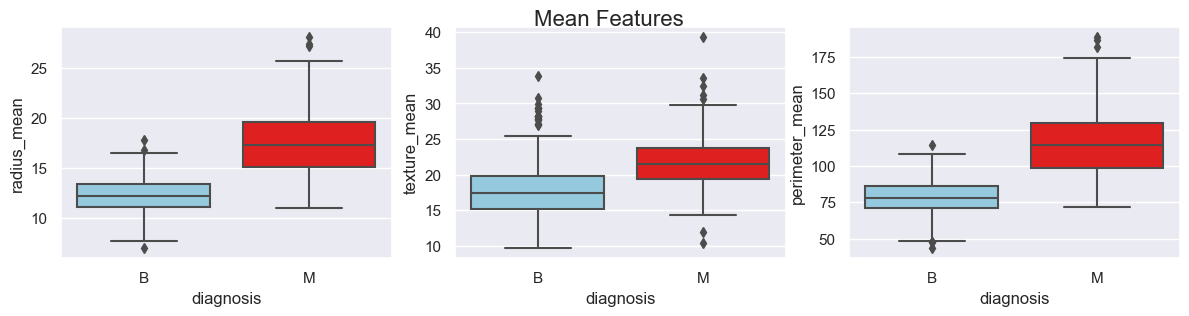

In [20]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 3)) 
plt.tight_layout()

fig.suptitle("Mean Features", fontsize=16)

sns.boxplot(data=df, x="diagnosis", y="radius_mean", ax=ax1, palette=diagnosis_cols, order=['B','M'])
sns.boxplot(data=df, x="diagnosis", y="texture_mean", ax=ax2, palette=diagnosis_cols, order=['B','M'])
sns.boxplot(data=df, x="diagnosis", y="perimeter_mean", ax=ax3, palette=diagnosis_cols, order=['B','M']);

In [21]:
radius_mean_b = df[df['diagnosis'] == 'B']['radius_mean']
radius_mean_m = df[df['diagnosis'] == 'M']['radius_mean']
t, p_radius_mean = ss.stats.ttest_ind(radius_mean_b, radius_mean_m, equal_var=False)
print(f'Radius Mean P-Value: {p_radius_mean:.3f}')
      
texture_mean_b = df[df['diagnosis'] == 'B']['texture_mean']
texture_mean_m = df[df['diagnosis'] == 'M']['texture_mean']
t, p_texture_mean = ss.stats.ttest_ind(texture_mean_b, texture_mean_m, equal_var=False)
print(f'Texture Mean P-Value: {p_texture_mean:.3f}')

perimeter_mean_b = df[df['diagnosis'] == 'B']['perimeter_mean']
perimeter_mean_m = df[df['diagnosis'] == 'M']['perimeter_mean']
t, p_perimeter_mean = ss.stats.ttest_ind(perimeter_mean_b, perimeter_mean_m, equal_var=False)
print(f'perimeter Mean P-Value: {p_perimeter_mean:.3f}')

Radius Mean P-Value: 0.000
Texture Mean P-Value: 0.000
perimeter Mean P-Value: 0.000


#### The mean of Radius Mean, Texture Mean and Perimeter Mean are greater in Malignant diagnosed tumors versus Benign diagnosed tumors. 

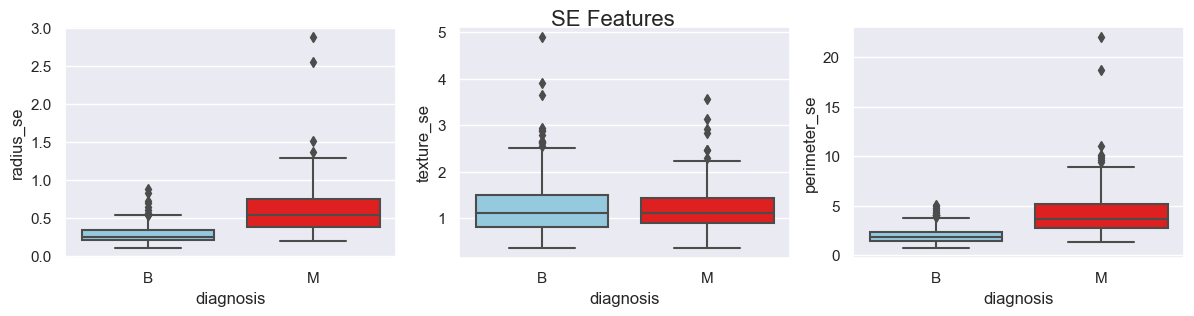

In [22]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 3)) 
plt.tight_layout()

fig.suptitle("SE Features", fontsize=16)

sns.boxplot(data=df, x="diagnosis", y="radius_se", ax=ax1, palette=diagnosis_cols, order=['B','M'])
sns.boxplot(data=df, x="diagnosis", y="texture_se", ax=ax2, palette=diagnosis_cols, order=['B','M'])
sns.boxplot(data=df, x="diagnosis", y="perimeter_se", ax=ax3, palette=diagnosis_cols, order=['B','M']);

In [23]:
radius_se_b = df[df['diagnosis'] == 'B']['radius_se']
radius_se_m = df[df['diagnosis'] == 'M']['radius_se']
t, p_radius_se = ss.stats.ttest_ind(radius_se_b, radius_se_m, equal_var=False)
print(f'Radius SE P-Value: {p_radius_se:.3f}')
      
texture_se_b = df[df['diagnosis'] == 'B']['texture_se']
texture_se_m = df[df['diagnosis'] == 'M']['texture_se']
t, p_texture_se = ss.stats.ttest_ind(texture_se_b, texture_se_m, equal_var=False)
print(f'Texture SE P-Value: {p_texture_se:.3f}')

perimeter_se_b = df[df['diagnosis'] == 'B']['perimeter_se']
perimeter_se_m = df[df['diagnosis'] == 'M']['perimeter_se']
t, p_perimeter_se = ss.stats.ttest_ind(perimeter_se_b, perimeter_se_m, equal_var=False)
print(f'Perimeter SE P-Value: {p_perimeter_se:.3f}')

Radius SE P-Value: 0.000
Texture SE P-Value: 0.835
Perimeter SE P-Value: 0.000


#### The mean of Radius SE and Perimeter SE are slightly greater in Malignant diagnosed tumors versus Benign diagnosed tumors. Not much Difference for Texture SE. 

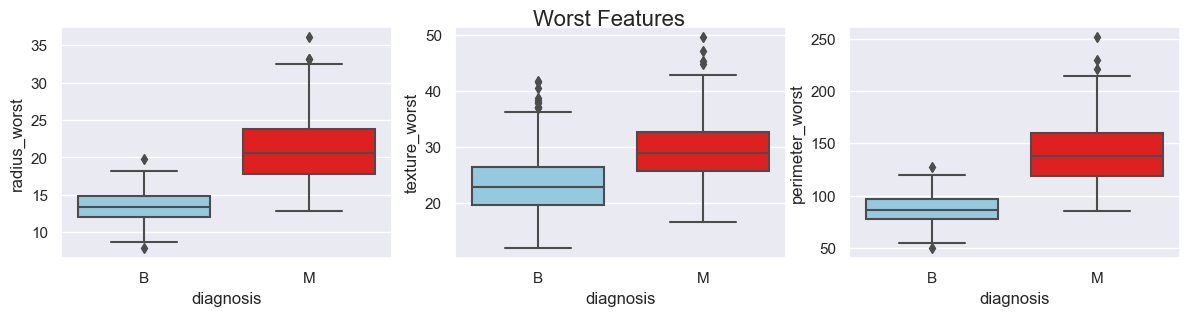

In [24]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 3)) 
plt.tight_layout()

fig.suptitle("Worst Features", fontsize=16)

sns.boxplot(data=df, x="diagnosis", y="radius_worst", ax=ax1, palette=diagnosis_cols, order=['B','M'])
sns.boxplot(data=df, x="diagnosis", y="texture_worst", ax=ax2, palette=diagnosis_cols, order=['B','M'])
sns.boxplot(data=df, x="diagnosis", y="perimeter_worst", ax=ax3, palette=diagnosis_cols, order=['B','M']);

In [25]:
radius_worst_b = df[df['diagnosis'] == 'B']['radius_worst']
radius_worst_m = df[df['diagnosis'] == 'M']['radius_worst']
t, p_radius_worst = ss.stats.ttest_ind(radius_worst_b, radius_worst_m, equal_var=False)
print(f'Radius Worst P-Value: {p_radius_se:.3f}')
      
texture_worst_b = df[df['diagnosis'] == 'B']['texture_worst']
texture_worst_m = df[df['diagnosis'] == 'M']['texture_worst']
t, p_texture_worst = ss.stats.ttest_ind(texture_worst_b, texture_worst_m, equal_var=False)
print(f'Texture Worst P-Value: {p_texture_worst:.3f}')

perimeter_worst_b = df[df['diagnosis'] == 'B']['perimeter_worst']
perimeter_worst_m = df[df['diagnosis'] == 'M']['perimeter_worst']
t, p_perimeter_worst = ss.stats.ttest_ind(perimeter_worst_b, perimeter_worst_m, equal_var=False)
print(f'Perimeter Worst P-Value: {p_perimeter_worst:.3f}')

Radius Worst P-Value: 0.000
Texture Worst P-Value: 0.000
Perimeter Worst P-Value: 0.000


#### The mean of Radius Worst, Texture Worst and Perimeter Sworst are greater in Malignant diagnosed tumors versus Benign diagnosed tumors. 

## Features - Area, Smoothness and Compactness

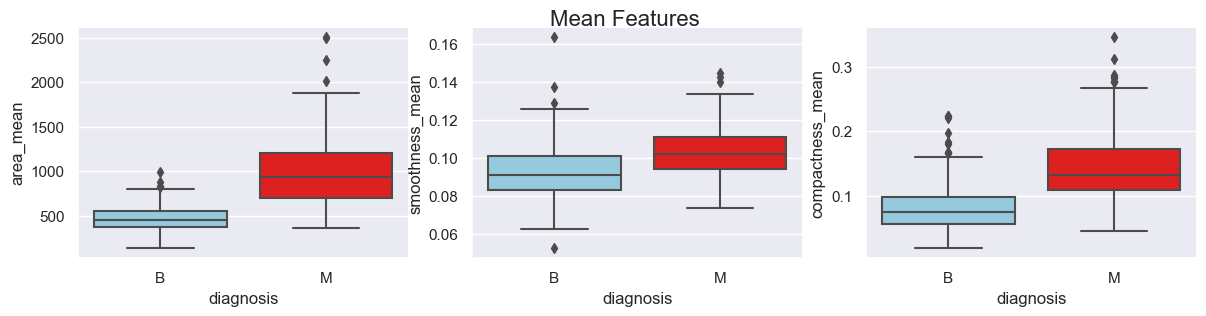

In [26]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 3)) 
plt.tight_layout()

fig.suptitle("Mean Features", fontsize=16)

sns.boxplot(data=df, x="diagnosis", y="area_mean", ax=ax1, palette=diagnosis_cols, order=['B','M'])
sns.boxplot(data=df, x="diagnosis", y="smoothness_mean", ax=ax2, palette=diagnosis_cols, order=['B','M'])
sns.boxplot(data=df, x="diagnosis", y="compactness_mean", ax=ax3, palette=diagnosis_cols, order=['B','M']);

In [27]:
area_mean_b = df[df['diagnosis'] == 'B']['area_mean']
area_mean_m = df[df['diagnosis'] == 'M']['area_mean']
t, p_area_mean = ss.stats.ttest_ind(area_mean_b, area_mean_m, equal_var=False)
print(f'Area Mean P-Value: {p_area_mean:.3f}')
      
smoothness_mean_b = df[df['diagnosis'] == 'B']['smoothness_mean']
smoothness_mean_m = df[df['diagnosis'] == 'M']['smoothness_mean']
t, p_smoothness_mean = ss.stats.ttest_ind(smoothness_mean_b, smoothness_mean_m, equal_var=False)
print(f'Smoothness Mean P-Value: {p_smoothness_mean:.3f}')

compactness_mean_b = df[df['diagnosis'] == 'B']['compactness_mean']
compactness_mean_m = df[df['diagnosis'] == 'M']['compactness_mean']
t, p_compactness_mean = ss.stats.ttest_ind(compactness_mean_b, compactness_mean_m, equal_var=False)
print(f'Compactness Mean P-Value: {p_compactness_mean:.3f}')

Area Mean P-Value: 0.000
Smoothness Mean P-Value: 0.000
Compactness Mean P-Value: 0.000


#### xxx

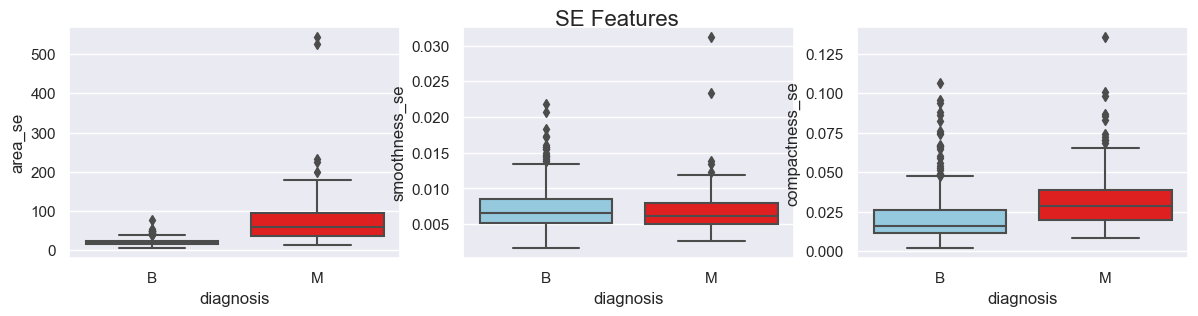

In [28]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 3)) 
plt.tight_layout()

fig.suptitle("SE Features", fontsize=16)

sns.boxplot(data=df, x="diagnosis", y="area_se", ax=ax1, palette=diagnosis_cols, order=['B','M'])
sns.boxplot(data=df, x="diagnosis", y="smoothness_se", ax=ax2, palette=diagnosis_cols, order=['B','M'])
sns.boxplot(data=df, x="diagnosis", y="compactness_se", ax=ax3, palette=diagnosis_cols, order=['B','M']);

In [29]:
area_se_b = df[df['diagnosis'] == 'B']['area_se']
area_se_m = df[df['diagnosis'] == 'M']['area_se']
t, p_area_se = ss.stats.ttest_ind(area_se_b, area_se_m, equal_var=False)
print(f'Area SE P-Value: {p_area_se:.3f}')
      
smoothness_se_b = df[df['diagnosis'] == 'B']['smoothness_se']
smoothness_se_m = df[df['diagnosis'] == 'M']['smoothness_se']
t, p_smoothness_se = ss.stats.ttest_ind(smoothness_se_b, smoothness_se_m, equal_var=False)
print(f'Smoothness SE P-Value: {p_smoothness_se:.3f}')

compactness_se_b = df[df['diagnosis'] == 'B']['compactness_se']
compactness_se_m = df[df['diagnosis'] == 'M']['compactness_se']
t, p_compactness_se = ss.stats.ttest_ind(compactness_se_b, compactness_se_m, equal_var=False)
print(f'Compactness SE P-Value: {p_compactness_se:.3f}')

Area SE P-Value: 0.000
Smoothness SE P-Value: 0.105
Compactness SE P-Value: 0.000


#### xxx

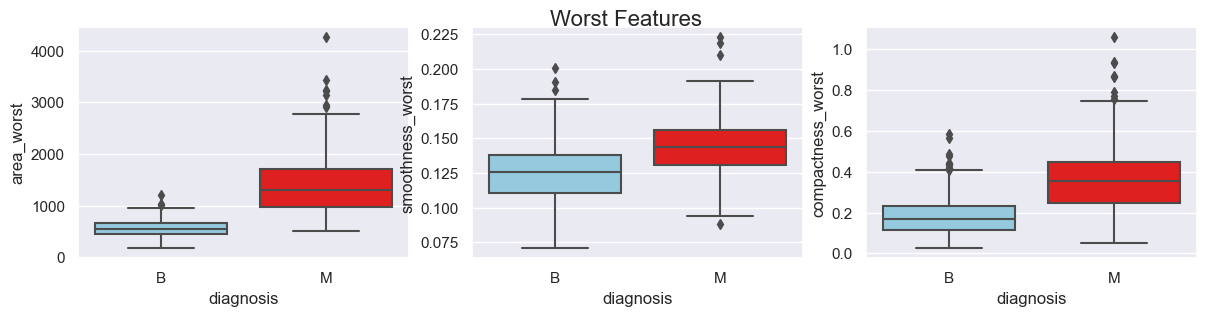

In [30]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 3)) 
plt.tight_layout()

fig.suptitle("Worst Features", fontsize=16)

sns.boxplot(data=df, x="diagnosis", y="area_worst", ax=ax1, palette=diagnosis_cols, order=['B','M'])
sns.boxplot(data=df, x="diagnosis", y="smoothness_worst", ax=ax2, palette=diagnosis_cols, order=['B','M'])
sns.boxplot(data=df, x="diagnosis", y="compactness_worst", ax=ax3, palette=diagnosis_cols, order=['B','M']);

In [31]:
area_worst_b = df[df['diagnosis'] == 'B']['area_worst']
area_worst_m = df[df['diagnosis'] == 'M']['area_worst']
t, p_worst_mean = ss.stats.ttest_ind(area_worst_b, area_worst_m, equal_var=False)
print(f'Area Worst P-Value: {p_worst_mean:.3f}')
      
smoothness_worst_b = df[df['diagnosis'] == 'B']['smoothness_worst']
smoothness_worst_m = df[df['diagnosis'] == 'M']['smoothness_worst']
t, p_smoothness_worst = ss.stats.ttest_ind(smoothness_worst_b, smoothness_worst_m, equal_var=False)
print(f'Smoothness Worst P-Value: {p_smoothness_worst:.3f}')

compactness_worst_b = df[df['diagnosis'] == 'B']['compactness_worst']
compactness_worst_m = df[df['diagnosis'] == 'M']['compactness_worst']
t, p_compactness_worst = ss.stats.ttest_ind(compactness_worst_b, compactness_worst_m, equal_var=False)
print(f'Compactness Worst P-Value: {p_compactness_worst:.3f}')

Area Worst P-Value: 0.000
Smoothness Worst P-Value: 0.000
Compactness Worst P-Value: 0.000


**xx**

## Features - Concavity, Concave Point, Symmetry and Fractal Dimension

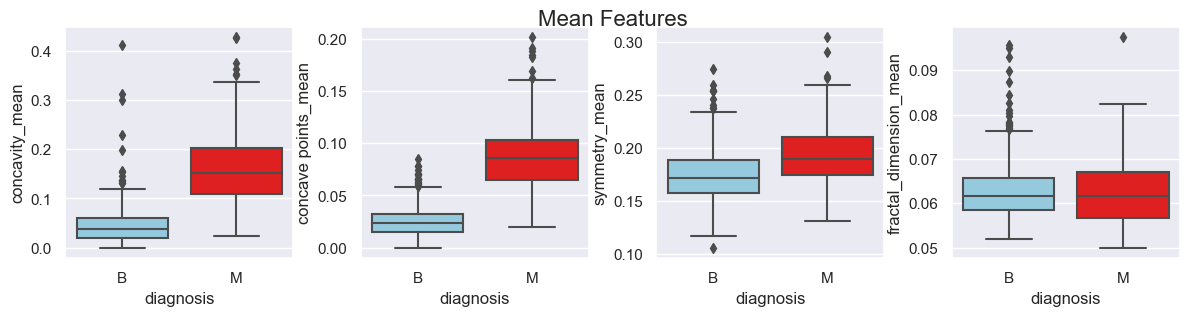

In [32]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(12, 3)) 
plt.tight_layout()

fig.suptitle("Mean Features", fontsize=16)

sns.boxplot(data=df, x="diagnosis", y="concavity_mean", ax=ax1, palette=diagnosis_cols, order=['B','M'])
sns.boxplot(data=df, x="diagnosis", y="concave points_mean", ax=ax2, palette=diagnosis_cols, order=['B','M'])
sns.boxplot(data=df, x="diagnosis", y="symmetry_mean", ax=ax3, palette=diagnosis_cols, order=['B','M'])
sns.boxplot(data=df, x="diagnosis", y="fractal_dimension_mean", ax=ax4, palette=diagnosis_cols, order=['B','M']);

In [33]:
concavity_mean_b = df[df['diagnosis'] == 'B']['concavity_mean']
concavity_mean_m = df[df['diagnosis'] == 'M']['concavity_mean']
t, p_concavity_mean = ss.stats.ttest_ind(concavity_mean_b, concavity_mean_m, equal_var=False)
print(f'Concavity Mean P-Value: {p_concavity_mean:.3f}')
      
concave_points_mean_b = df[df['diagnosis'] == 'B']['concave points_mean']
concave_points_mean_m = df[df['diagnosis'] == 'M']['concave points_mean']
t, p_concave_points_mean = ss.stats.ttest_ind(concave_points_mean_b, concave_points_mean_m, equal_var=False)
print(f'Concave Points Mean P-Value: {p_concave_points_mean:.3f}')

symmetry_mean_b = df[df['diagnosis'] == 'B']['symmetry_mean']
symmetry_mean_m = df[df['diagnosis'] == 'M']['symmetry_mean']
t, p_symmetry_mean = ss.stats.ttest_ind(symmetry_mean_b, symmetry_mean_m, equal_var=False)
print(f'Symmetry Mean P-Value: {p_symmetry_mean:.3f}')

fractal_dimension_mean_b = df[df['diagnosis'] == 'B']['fractal_dimension_mean']
fractal_dimension_mean_m = df[df['diagnosis'] == 'M']['fractal_dimension_mean']
t, p_fractal_dimension_mean = ss.stats.ttest_ind(fractal_dimension_mean_b, fractal_dimension_mean_m, equal_var=False)
print(f'Fractal Dimension Mean P-Value: {p_fractal_dimension_mean:.3f}')

Concavity Mean P-Value: 0.000
Concave Points Mean P-Value: 0.000
Symmetry Mean P-Value: 0.000
Fractal Dimension Mean P-Value: 0.767


**xx**

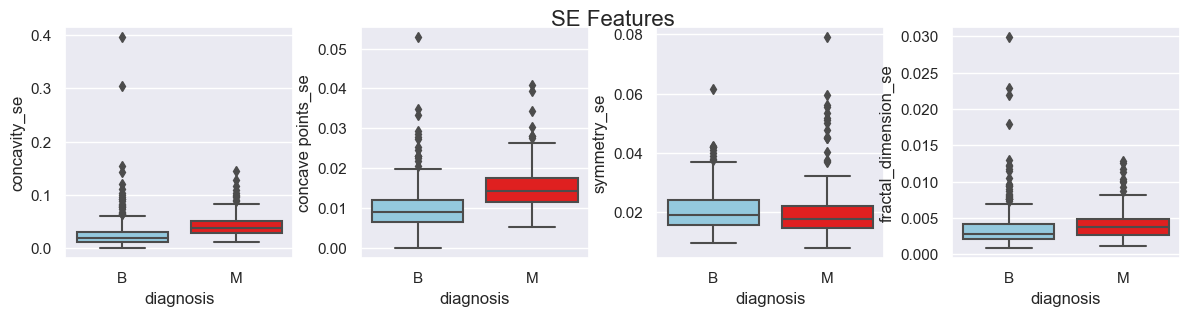

In [34]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(12, 3)) 
plt.tight_layout()

fig.suptitle("SE Features", fontsize=16)

sns.boxplot(data=df, x="diagnosis", y="concavity_se", ax=ax1, palette=diagnosis_cols, order=['B','M'])
sns.boxplot(data=df, x="diagnosis", y="concave points_se", ax=ax2, palette=diagnosis_cols, order=['B','M'])
sns.boxplot(data=df, x="diagnosis", y="symmetry_se", ax=ax3, palette=diagnosis_cols, order=['B','M'])
sns.boxplot(data=df, x="diagnosis", y="fractal_dimension_se", ax=ax4, palette=diagnosis_cols, order=['B','M']);

In [35]:
concavity_se_b = df[df['diagnosis'] == 'B']['concavity_se']
concavity_se_m = df[df['diagnosis'] == 'M']['concavity_se']
t, p_concavity_se = ss.stats.ttest_ind(concavity_se_b, concavity_se_m, equal_var=False)
print(f'Concavity SE P-Value: {p_concavity_se:.3f}')
      
concave_points_se_b = df[df['diagnosis'] == 'B']['concave points_se']
concave_points_se_m = df[df['diagnosis'] == 'M']['concave points_se']
t, p_concave_points_se = ss.stats.ttest_ind(concave_points_se_b, concave_points_se_m, equal_var=False)
print(f'Concave Points SE P-Value: {p_concave_points_se:.3f}')

symmetry_se_b = df[df['diagnosis'] == 'B']['symmetry_se']
symmetry_se_m = df[df['diagnosis'] == 'M']['symmetry_se']
t, p_symmetry_se = ss.stats.ttest_ind(symmetry_se_b, symmetry_se_m, equal_var=False)
print(f'Symmetry SE P-Value: {p_symmetry_se:.3f}')

fractal_dimension_se_b = df[df['diagnosis'] == 'B']['fractal_dimension_se']
fractal_dimension_se_m = df[df['diagnosis'] == 'M']['fractal_dimension_se']
t, p_fractal_dimension_se = ss.stats.ttest_ind(fractal_dimension_se_b, fractal_dimension_se_m, equal_var=False)
print(f'Fractal Dimension SE P-Value: {p_fractal_dimension_se:.3f}')

Concavity SE P-Value: 0.000
Concave Points SE P-Value: 0.000
Symmetry SE P-Value: 0.887
Fractal Dimension SE P-Value: 0.042


**xx**

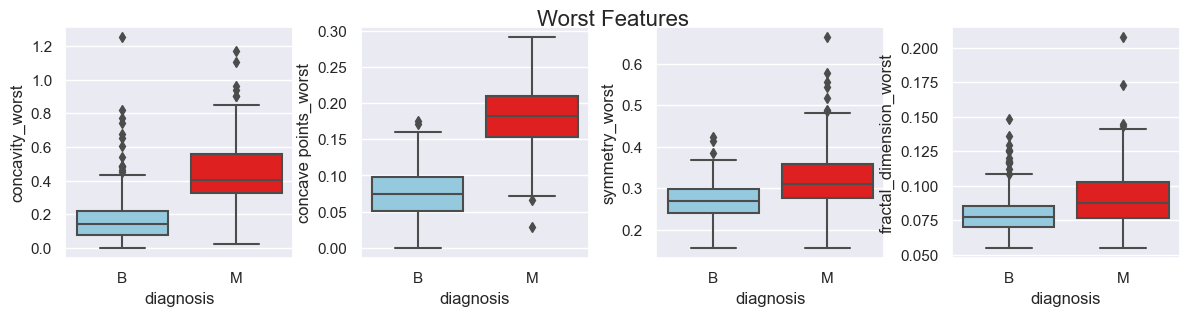

In [36]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(12, 3)) 
plt.tight_layout()

fig.suptitle("Worst Features", fontsize=16)

sns.boxplot(data=df, x="diagnosis", y="concavity_worst", ax=ax1, palette=diagnosis_cols, order=['B','M'])
sns.boxplot(data=df, x="diagnosis", y="concave points_worst", ax=ax2, palette=diagnosis_cols, order=['B','M'])
sns.boxplot(data=df, x="diagnosis", y="symmetry_worst", ax=ax3, palette=diagnosis_cols, order=['B','M'])
sns.boxplot(data=df, x="diagnosis", y="fractal_dimension_worst", ax=ax4, palette=diagnosis_cols, order=['B','M']);

In [37]:
concavity_worst_b = df[df['diagnosis'] == 'B']['concavity_worst']
concavity_worst_m = df[df['diagnosis'] == 'M']['concavity_worst']
t, p_concavity_worst = ss.stats.ttest_ind(concavity_worst_b, concavity_worst_m, equal_var=False)
print(f'Concavity Worst P-Value: {p_concavity_worst:.3f}')
      
concave_points_worst_b = df[df['diagnosis'] == 'B']['concave points_worst']
concave_points_worst_m = df[df['diagnosis'] == 'M']['concave points_worst']
t, p_concave_points_worst = ss.stats.ttest_ind(concave_points_worst_b, concave_points_worst_m, equal_var=False)
print(f'Concave Points Worst P-Value: {p_concave_points_worst:.3f}')

symmetry_worst_b = df[df['diagnosis'] == 'B']['symmetry_worst']
symmetry_worst_m = df[df['diagnosis'] == 'M']['symmetry_worst']
t, p_symmetry_worst = ss.stats.ttest_ind(symmetry_worst_b, symmetry_worst_m, equal_var=False)
print(f'Symmetry Worst P-Value: {p_symmetry_worst:.3f}')

fractal_dimension_worst_b = df[df['diagnosis'] == 'B']['fractal_dimension_worst']
fractal_dimension_worst_m = df[df['diagnosis'] == 'M']['fractal_dimension_worst']
t, p_fractal_dimension_worst = ss.stats.ttest_ind(fractal_dimension_worst_b, fractal_dimension_worst_m, equal_var=False)
print(f'Fractal Dimension Worst P-Value: {p_fractal_dimension_worst:.3f}')

Concavity Worst P-Value: 0.000
Concave Points Worst P-Value: 0.000
Symmetry Worst P-Value: 0.000
Fractal Dimension Worst P-Value: 0.000


**xx**

### Correlation with Diagnosis

In [38]:
tumor_types = {'B': 0, 'M':1}
for tumor_name, tumor_code in tumor_types.items():
    df['diagnosis'] = df['diagnosis'].replace(to_replace = tumor_name, value = tumor_code)

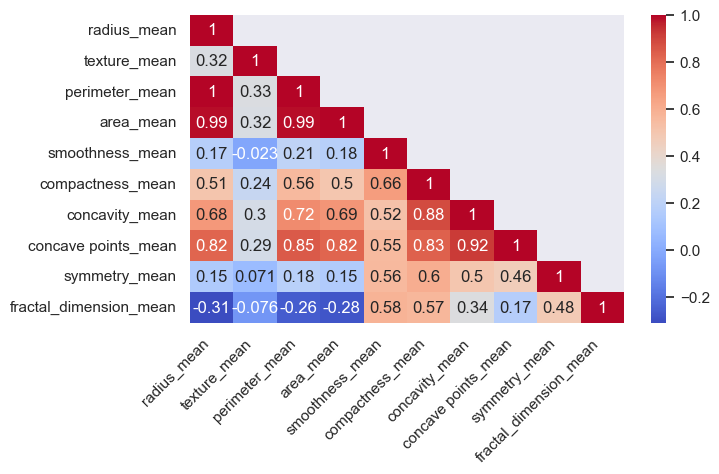

In [39]:
corr_means = mean_features_df.corr()
# Create mask
mask = np.zeros_like(corr_means, dtype=bool)
mask[np.triu_indices_from(mask, k=1)] = True
fig, ax = plt.subplots(figsize=(7, 4))
sns.heatmap(corr_means, annot = True, ax = ax, cmap="coolwarm", mask=mask)
plt.xticks(rotation=45, ha='right');

In [40]:
prediction_vars1 = ["radius_mean", "perimeter_mean", "area_mean", "compactness_mean", "concavity_mean", "concave points_mean"]
prediction_vars1

['radius_mean',
 'perimeter_mean',
 'area_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean']

In [41]:
mean_features

['diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean']

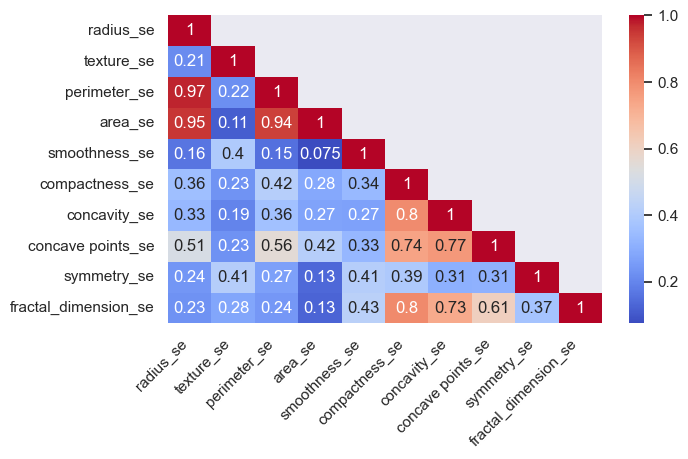

In [42]:
corr_se = se_features_df.corr()
# Create mask
mask = np.zeros_like(corr_se, dtype=bool)
mask[np.triu_indices_from(mask, k=1)] = True
fig, ax = plt.subplots(figsize=(7, 4))
sns.heatmap(corr_se, annot = True, ax = ax, cmap="coolwarm", mask=mask)
plt.xticks(rotation=45, ha='right');

In [43]:
prediction_vars2 = []
prediction_vars2

[]

In [44]:
mean_features

['diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean']

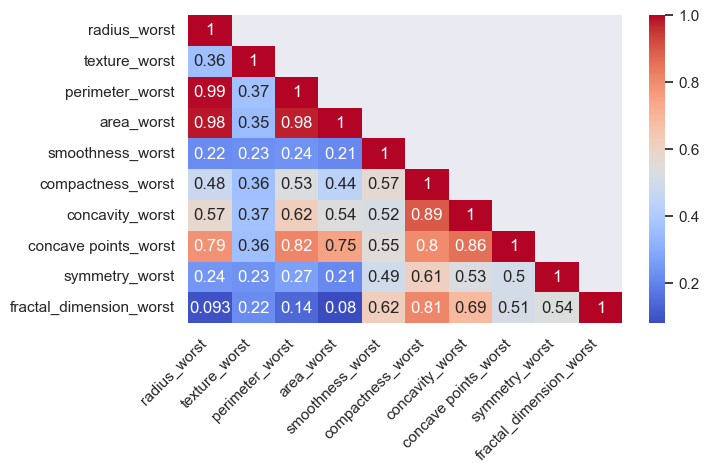

In [45]:
corr_worst = worst_features_df.corr()
# Create mask
mask = np.zeros_like(corr_worst, dtype=bool)
mask[np.triu_indices_from(mask, k=1)] = True
fig, ax = plt.subplots(figsize=(7, 4))
sns.heatmap(corr_worst, annot = True, ax = ax, cmap="coolwarm", mask=mask)
plt.xticks(rotation=45, ha='right');

In [46]:
prediction_vars3 = ["radius_worst", "perimeter_worst", "area_worst", "concavity_worst", "concave points_worst"]
prediction_vars3

['radius_worst',
 'perimeter_worst',
 'area_worst',
 'concavity_worst',
 'concave points_worst']

In [47]:
prediction_vars = prediction_vars1 + prediction_vars2 + prediction_vars3
prediction_vars

['radius_mean',
 'perimeter_mean',
 'area_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'radius_worst',
 'perimeter_worst',
 'area_worst',
 'concavity_worst',
 'concave points_worst']

<h2 style="color: #001a79;">Literature Review - Machine Learning on the BCW (Diagnostic) Dataset
</h2>

<hr style="border-top: 1px solid #001a79;" />

"<a href="https://www.youtube.com/watch?v=elojMnjn4kk&list=PL5-da3qGB5ICeMbQuqbbCOQWcS6OYBr5A&index=1&ab_channel=DataSchool" target="_blank">Machine Learning</a> *is the semi-automated extraction of knowledge from data".*

There are two types of machine learning:
1. Supervised learning - using labeled datasets to train algorithms to classify or predict outcomes accurately. 
2. Unsupervised learning - extracting structure from data without pre-existing labels i.e. segmenting into cathegories with similiar responses.  

In the case of the BCW (Diagnostic) dataset supervised learning is used to predict the diagnosis of a given patient (Benign - 0 or Malignant - 1) by training a model on the tumors features. 

### Techniques and Classifiers Used

#### K-Nearest Neighbours (KNN)

One of the supervised learning strategies used for solving the Breast Cancer classification problem is the K-nearest neighbor method. 

K-Nearest Neighbours takes in a value k, where k is greater than 0, and searches for k number of observations nearest the unknown breast cancer sample. The predicted classification for the unknown breast cancer sample is based of the most popular breast cancer diagnosis of the k nearest obeservations. 

The example below shows a classification problem with two classes A and B. K is set to 7 in the KNN algorithm. There are 3 near neighbours that are in class A and 4 in class B. As the majority are in class B, the point is classified as class B. 

<img src="content/KNN.PNG" alt="Breast cancer" style="width: 850px;"/> 

Source: <a href="https://www.ibm.com/topics/knn" target="_blank">IBM: K-Nearest Neighbours Algorithm</a>

#### Support Vector Machines

SVMs perform the classification by drawing a hyperplane (i.e, a line in 2D or a plane in 3D). This splits the points so that all points of one class are on one side of the hyperplane and all points of the other class are on the other side of the hyperplane. While there could be multiple hyperplanes SVM tries to find the one that best seperates the two categories (optimal hyperplane). Finding this line maximises the distance to the points in either class (maximum margin) and the points that fall exactly on this line are called the supporting vectors (Shaded points below).  

<img src="content/svm.PNG" alt="Breast cancer" style="width: 350px;"/> 

Sources: <br>
<a href="https://www.youtube.com/watch?v=_YPScrckx28&ab_channel=VisuallyExplained" target="_blank">
Visually Explained (YouTube): Support Vector Machine (SVM) in 2 minutes</a><br>
<a href="https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47" target="_blank">Towards Data Science: Support Vector Machine</a><br>

#### Decision Trees

A decision tree is a binary tree that recursively splits the dataset using decision nodes until we are left with pure leaf nodes (i.e the data with only one type of class). 

The Root Node is where the decision tree starts. It represents the entire dataset, which further gets divided into two or more homogeneous sets. Splitting is the process of dividing the decision node/root node into sub-nodes according to the given conditions. Leaf nodes are the final output node, and the tree cannot be segregated further after getting a leaf node. 

<img src="content/decision-tree.PNG" alt="Breast cancer" style="width: 450px;"/> 

<a href="https://www.javatpoint.com/machine-learning-decision-tree-classification-algorithm" target="_blank">Java T Point: Decision Tree Classification Algorithm</a>

Below shows an example of a decision tree for the BCW (Diagnostic) Dataset. The root decision node is whether area_worst is less than or equal to, or greater than 880.8. This is divided into two sub-trees. If we look at the sub-tree where area_worst is greater than 880.8, concavity_mean is the next decision node. If concavity_mean is greater than 0.0716, the result is a Malignant leaf node and this path ends. If concavity_mean is less than or equal to 0.0716, texture_mean is the next decision node. If texture_mean is less than or equal to 19.54 the result is a Malignant leaf node. If texture_mean is greater than 19.54, the result is a Benign leaf node. 

<img src="content/decision-tree-bc.PNG" alt="Breast cancer" style="width: 450px;"/> 

<a href="https://www.irjet.net/archives/V5/i3/IRJET-V5I3654.pdf" target="_blank">IRJET: Diagnosis of Breast Cancer using Decision Tree Models and SVM</a>

#### Random Forests

The random forest algorithm groups multiple decision trees 

<img src="content/random_forest.png" alt="Breast cancer" style="width: 650px;"/> 

### Algorithms Performance 

The following are common measures used to compare classification alogrithms success.

- Confusion matrix 
- Accuracy 
- Sensitivity 
- Specificity 
- Percision
- F1 Score

#### Confusion Matrix

A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes. The matrix compares the actual target values with those predicted by the machine learning model.

<img src="content/confusion-matrix.jpg" alt="Breast cancer" style="width: 550px;"/> 

**TP** - The predicted value is positive and the actual value is positive <br>
**TN** - The predicted value is negative and the actual value is negative

**FP** - The predicted value is positive but the actual value is negative (Type I error) <br>
**FN** - The predicted value is negative but the actual value is positive (Type II error)

A good model is one which has high TP and TN rates, while low FP and FN rates.

In [48]:
def getConfusionValues(cm):
    TP = cm[0][0]
    FP = cm[0][1]
    FN = cm[1][0]
    TN = cm[1][1]
    return TP, FP, FN, TN 

#### Accuracy

Accuracy simply measures how often the classifier makes the correct prediction. It’s the ratio between the number of correct predictions and the total number of predictions.

$$Accuracy = \frac{TP + TN}{TP + FP + FN + TN}$$

In [49]:
def getAccuracy(vals):
    acc = (vals[0] + vals[3]) / (vals[0] + vals[1] + vals[2] + vals[3])
    return acc

#### Sensitivity

(true positive rate) refers to the probability of a positive test, conditioned on truly being positive.

$$Sensitivity = \frac{TP}{TP + FN}$$

In [50]:
# Recall/True positive rate
def getSensitivity(vals):
    sens = (vals[0]) / (vals[0] + vals[2])
    return sens

#### Specificity

(true negative rate) refers to the probability of a negative test, conditioned on truly being negative.

$$Specificity = \frac{TN}{FP + TN}$$

In [51]:
#True negative rate
def getSpecificity(vals):
    spec = (vals[3]) / (vals[1] + vals[3])
    return spec

#### Percision

$$Percision = \frac{TP}{TP + FP}$$

In [52]:
def getPercision(vals):
    per = (vals[0]) / (vals[0] + vals[1])
    return per

#### F1-Score

$$F1score = \frac{2}{{\frac{1}{Recall}}+{\frac{1}{Recall}}}$$

In [53]:
def getF1Score(vals):
    recall = getSensitivity(vals)
    percision = getPercision(vals)
    f1 = (2) / ((1 / recall) + (1 / percision))
    return f1

In [54]:
def performance(vals, alg):
    accuracy = getAccuracy(vals) * 100
    sensitivity = getSensitivity(vals) * 100
    specificity = getSpecificity(vals) * 100
    precision = getPercision(vals) * 100
    F1score = getF1Score(vals) * 100
    
    print(f'{alg} Performance Metrics\n---------------------')
    print(f'Accuracy: {accuracy:.2f}%')
    print(f'Sensitivity: {sensitivity:.2f}%')
    print(f'Specificity: {specificity:.2f}%')
    print(f'Precision: {precision:.2f}%')
    print(f'F1 score: {F1score:.2f}%')

### Techniques and Classifiers Performance

#### K-Nearest Neighbours (KNN)

Results: <a href="https://dergipark.org.tr/tr/download/article-file/615107" target="_blank">ISVOS Journal 2018 - Classification and Diagnostic Prediction of Breast Cancers via Different Classifiers (Ahmet Saygılı)</a>

In [55]:
knn1 = [[204, 8], 
        [8, 349]]

In [56]:
knn3 = [[206, 6], 
        [9, 348]]

In [57]:
knn5 = [[204, 8], 
        [9, 348]]

In [58]:
performance(getConfusionValues(knn1), 'KNN where k = 1')

KNN where k = 1 Performance Metrics
---------------------
Accuracy: 97.19%
Sensitivity: 96.23%
Specificity: 97.76%
Precision: 96.23%
F1 score: 96.23%


In [59]:
performance(getConfusionValues(knn3), 'KNN where k = 3')

KNN where k = 3 Performance Metrics
---------------------
Accuracy: 97.36%
Sensitivity: 95.81%
Specificity: 98.31%
Precision: 97.17%
F1 score: 96.49%


In [60]:
performance(getConfusionValues(knn5), 'KNN where k = 5')

KNN where k = 5 Performance Metrics
---------------------
Accuracy: 97.01%
Sensitivity: 95.77%
Specificity: 97.75%
Precision: 96.23%
F1 score: 96.00%


#### Support Vector Machines

Results: <a href="https://dergipark.org.tr/tr/download/article-file/615107" target="_blank">ISVOS Journal 2018 - Classification and Diagnostic Prediction of Breast Cancers via Different Classifiers (Ahmet Saygılı)</a>

In [61]:
svm = [[205, 7], 
        [4, 353]]

In [62]:
performance(getConfusionValues(svm), 'SVM')

SVM Performance Metrics
---------------------
Accuracy: 98.07%
Sensitivity: 98.09%
Specificity: 98.06%
Precision: 96.70%
F1 score: 97.39%


#### Decision Trees

<a href="https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8993572/" target="_blank">NLM: Diagnosis of Breast Cancer Pathology on the Wisconsin Dataset with the Help of Data Mining Classification and Clustering Techniques (Walid Theib Mohammad, Ronza Teete, Heyam Al-Aaraj, Yousef Saleh Yousef Rubbai, Majd Mowafaq Arabyat)</a>

In [63]:
DT = [[195, 17], 
        [24, 333]]

In [64]:
performance(getConfusionValues(DT), 'Decision Trees')

Decision Trees Performance Metrics
---------------------
Accuracy: 92.79%
Sensitivity: 89.04%
Specificity: 95.14%
Precision: 91.98%
F1 score: 90.49%


#### Random Forests

In [65]:
RF = [[209, 3], 
        [4, 353]]

In [66]:
performance(getConfusionValues(RF), 'Random Forests')

Random Forests Performance Metrics
---------------------
Accuracy: 98.77%
Sensitivity: 98.12%
Specificity: 99.16%
Precision: 98.58%
F1 score: 98.35%


In [67]:
knn1_acc = round(getAccuracy(getConfusionValues(knn1)) * 100, 2)
knn3_acc = round(getAccuracy(getConfusionValues(knn3)) * 100, 2)
knn5_acc = round(getAccuracy(getConfusionValues(knn5)) * 100, 2)
svm_acc = round(getAccuracy(getConfusionValues(svm)) * 100, 2)
DT_acc = round(getAccuracy(getConfusionValues(DT)) * 100, 2)
RF_acc = round(getAccuracy(getConfusionValues(RF)) * 100, 2)

In [68]:
accuracy_scores = {
    "KNN\n k=1": knn1_acc, 
    "KNN\n k=3": knn3_acc, 
    "KNN\n k=5": knn5_acc, 
    "SVM": svm_acc, 
    "Decision\n Tree": DT_acc, 
    "Random\n Forest": RF_acc, 
}

sorted_accuracy_scores = {}
sorted_keys = sorted(accuracy_scores, key=accuracy_scores.get)

for w in sorted_keys:
    sorted_accuracy_scores[w] = accuracy_scores[w]
    
sorted_accuracy_scores

{'Decision\n Tree': 92.79,
 'KNN\n k=5': 97.01,
 'KNN\n k=1': 97.19,
 'KNN\n k=3': 97.36,
 'SVM': 98.07,
 'Random\n Forest': 98.77}

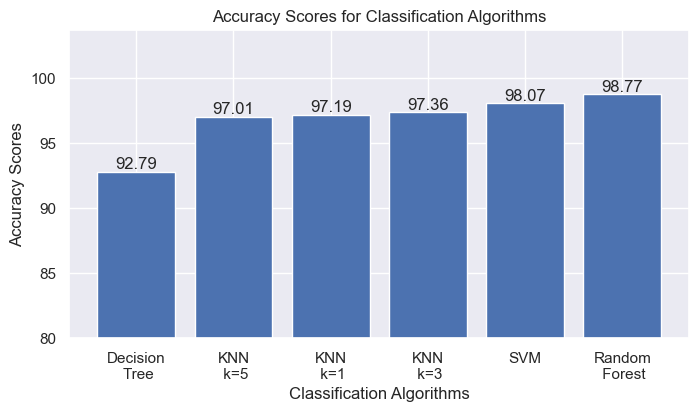

In [69]:
# Plot the probabilities for each sum outcome of 2 dice. 
fig, ax = plt.subplots(figsize=(8,4))
ax.set_xlabel("Classification Algorithms")
ax.set_ylabel("Accuracy Scores")
ax.set_title("Accuracy Scores for Classification Algorithms")

# Plot from dictionary. 
barplot = plt.bar(range(len(sorted_accuracy_scores)), list(sorted_accuracy_scores.values()), align='center')
plt.xticks(range(len(sorted_accuracy_scores)), list(sorted_accuracy_scores.keys()))
plt.ylim(bottom = 80)
plt.bar_label(barplot, labels = sorted_accuracy_scores.values());

<h2 style="color: #001a79;">My Own Machine Learning on the BCW (Diagnostic) Dataset
</h2>

<hr style="border-top: 1px solid #001a79;" />

### Set up data for machine learning 

In [70]:
# Remove diagnosis (Y) from df and set as new dataframe X
X = df.drop(["diagnosis"], axis=1)
X

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     fractal_dimension_mean  ...  radius_worst  texture_worst  \
0                   0.07871  ...        25.380          17.33   
1                   0.05667  ...        24.990          23.41   
2                   0.05999  ...        23.570          25.53   
3                   0.09744  ...        14.910          26.50   
4                   0.05883  ...        22.540          16.67   
..                      ...  ...           ...            ...   
564                 0.05623  ...        25.450          26.40   
565                 0.05533  ...        23.690          38.25   
566                 0.05648  ...        18.980          34.12   
567                 0.07016  ...        25.740          39.42   
568                 0.05884  ...         9.456          30.37   

     perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0             184.60      2019.0           0.16220            0.66560   
1             158.80      1956.0           0.12380            0.18660   
2             152.50      1709.0           0.14440            0.42450   
3              98.87       567.7           0.20980            0.86630   
4             152.20      1575.0           0.13740            0.20500   
..               ...         ...               ...                ...   
564           166.10      2027.0           0.14100            0.21130   
565           155.00      1731.0           0.11660            0.19220   
566           126.70      1124.0           0.11390            0.30940   
567           184.60      1821.0           0.16500            0.86810   
568            59.16       268.6           0.08996            0.06444   

     concavity_worst  concave points_worst  symmetry_worst  \
0             0.7119                0.2654          0.4601   
1             0.2416                0.1860          0.2750   
2             0.4504                0.2430          0.3613   
3             0.6869                0.2575          0.6638   
4             0.4000                0.1625          0.2364   
..               ...                   ...             ...   
564           0.4107                0.2216         

In [71]:
# Set diagnosis collumn to be Y. 
Y = df["diagnosis"]
Y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [72]:
from sklearn.model_selection import train_test_split
# 85% training data
# 15% testing data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.15, random_state = 1)

### Remove features that we found earlier not to be correlated with diagnosis. 

In [73]:
x_train = x_train[prediction_vars]

In [74]:
x_test = x_test[prediction_vars]

### Techniques and Classifiers Used

#### K-Nearest Neighbours (KNN)
#### K = 1

In [95]:
from sklearn.neighbors import KNeighborsClassifier

In [96]:
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(x_train, y_train)
knn1_preds = knn1.predict(x_test)

In [97]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
knn1_cm = confusion_matrix(y_test, knn1_preds, labels=knn1.classes_)

#### K = 3

In [98]:
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(x_train, y_train)
knn3_preds = knn3.predict(x_test)

In [99]:
knn3_cm = confusion_matrix(y_test, knn3_preds, labels=knn3.classes_)

#### K = 5

In [100]:
knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(x_train, y_train)
knn5_preds = knn5.predict(x_test)

In [101]:
knn5_cm = confusion_matrix(y_test, knn5_preds, labels=knn5.classes_)

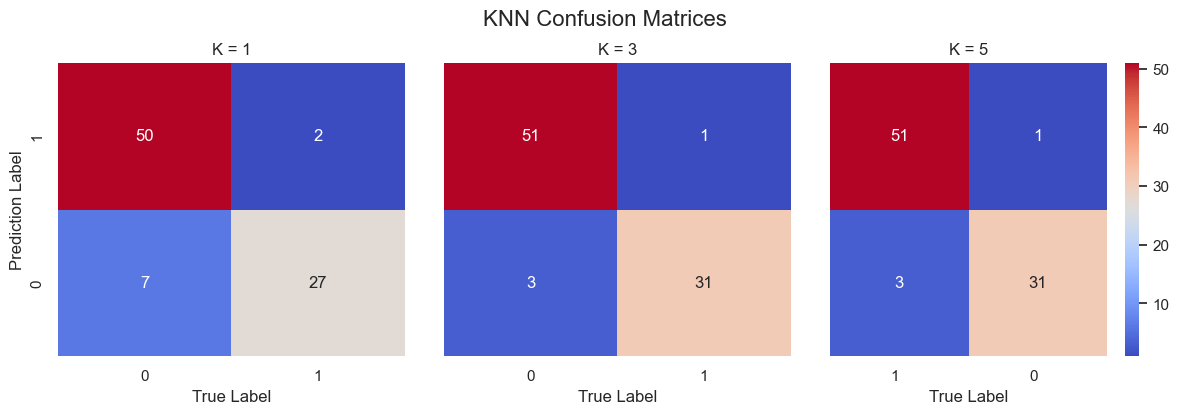

In [102]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,4),sharey=True)
# Set main title. 
fig.suptitle("KNN Confusion Matrices", fontsize=16)
fig.tight_layout()

ax1.title.set_text('K = 1')
sns.heatmap(knn1_cm, annot=True, cmap="coolwarm", cbar=False, ax = ax1)

ax2.title.set_text('K = 3')
sns.heatmap(knn3_cm, annot=True, cmap="coolwarm", cbar=False, ax = ax2)

ax3.title.set_text('K = 5')
sns.heatmap(knn5_cm, annot=True, cmap="coolwarm", ax = ax3)

plt.yticks([1.5, 0.5], ['0', '1'], ha='right')
plt.xticks([1.5, 0.5], ['0', '1'], ha='right')

ax1.set(xlabel='True Label', ylabel='Prediction Label')
ax2.set(xlabel='True Label');
ax3.set(xlabel='True Label');

In [103]:
performance(getConfusionValues(knn1_cm), 'KNN where k = 1')
print("\n")
performance(getConfusionValues(knn3_cm), 'KNN where k = 3')
print("\n")
performance(getConfusionValues(knn5_cm), 'KNN where k = 5')

KNN where k = 1 Performance Metrics
---------------------
Accuracy: 89.53%
Sensitivity: 87.72%
Specificity: 93.10%
Precision: 96.15%
F1 score: 91.74%


KNN where k = 3 Performance Metrics
---------------------
Accuracy: 95.35%
Sensitivity: 94.44%
Specificity: 96.88%
Precision: 98.08%
F1 score: 96.23%


KNN where k = 5 Performance Metrics
---------------------
Accuracy: 95.35%
Sensitivity: 94.44%
Specificity: 96.88%
Precision: 98.08%
F1 score: 96.23%


#### Support Vector Machines

In [107]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train, y_train)
svm_preds = svm.predict(x_test)

In [108]:
svm_cm = confusion_matrix(y_test, svm_preds, labels=svm.classes_)

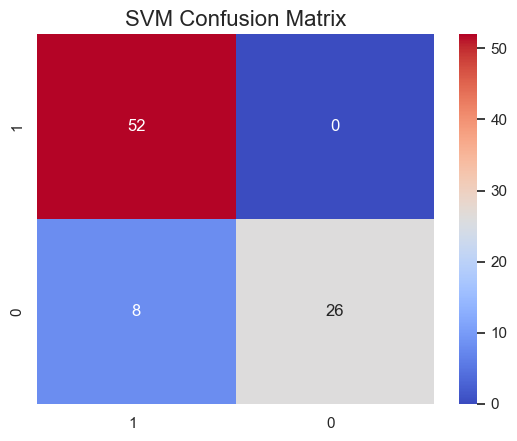

In [119]:
sns.heatmap(svm_cm, annot=True, cmap="coolwarm")

plt.yticks([1.5, 0.5], ['0', '1'], ha='right')
plt.xticks([1.5, 0.5], ['0', '1'], ha='right')

ax.set(xlabel='True Label', ylabel='Prediction Label')

plt.title("SVM Confusion Matrix", fontsize=16);

In [114]:
performance(getConfusionValues(svm_cm), 'Support Vector Machine')

Support Vector Machine where k = 1 Performance Metrics
---------------------
Accuracy: 90.70%
Sensitivity: 86.67%
Specificity: 100.00%
Precision: 100.00%
F1 score: 92.86%


#### Decision Trees

In [125]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(x_train, y_train)
dt_preds = dt.predict(x_test)

In [126]:
dt_cm = confusion_matrix(y_test, dt_preds, labels=dt.classes_)

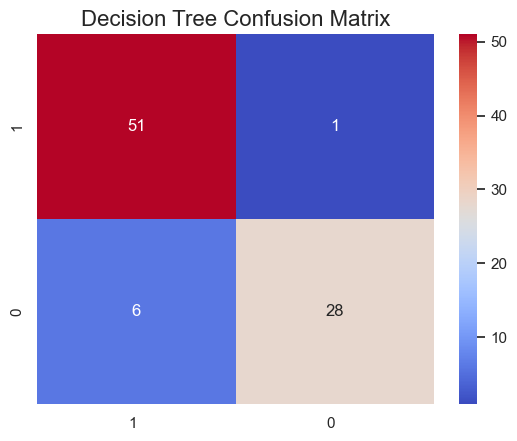

In [127]:
sns.heatmap(dt_cm, annot=True, cmap="coolwarm")

plt.yticks([1.5, 0.5], ['0', '1'], ha='right')
plt.xticks([1.5, 0.5], ['0', '1'], ha='right')

ax.set(xlabel='True Label', ylabel='Prediction Label')

plt.title("Decision Tree Confusion Matrix", fontsize=16);

In [129]:
performance(getConfusionValues(dt_cm), 'Decision Tree')

Decision Tree Performance Metrics
---------------------
Accuracy: 91.86%
Sensitivity: 89.47%
Specificity: 96.55%
Precision: 98.08%
F1 score: 93.58%


#### Random Forests

In [122]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf_preds = rf.predict(x_test)

In [123]:
rf_cm = confusion_matrix(y_test, rf_preds, labels=rf.classes_)

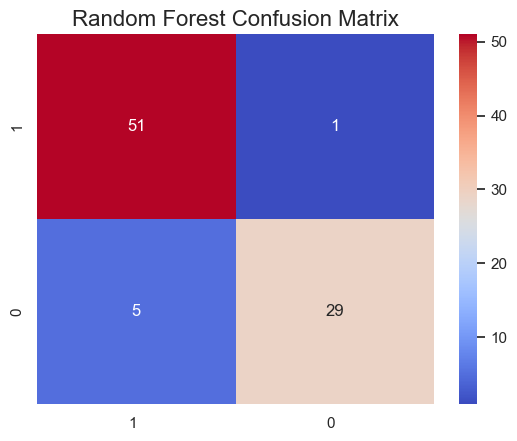

In [124]:
sns.heatmap(rf_cm, annot=True, cmap="coolwarm")

plt.yticks([1.5, 0.5], ['0', '1'], ha='right')
plt.xticks([1.5, 0.5], ['0', '1'], ha='right')

ax.set(xlabel='True Label', ylabel='Prediction Label')

plt.title("Random Forest Confusion Matrix", fontsize=16);

In [130]:
performance(getConfusionValues(rf_cm), 'Random Forest')

Random Forest Performance Metrics
---------------------
Accuracy: 93.02%
Sensitivity: 91.07%
Specificity: 96.67%
Precision: 98.08%
F1 score: 94.44%


In [133]:
my_knn1_acc = round(getAccuracy(getConfusionValues(knn1_cm)) * 100, 2)
my_knn3_acc = round(getAccuracy(getConfusionValues(knn3_cm)) * 100, 2)
my_knn5_acc = round(getAccuracy(getConfusionValues(knn5_cm)) * 100, 2)
my_svm_acc = round(getAccuracy(getConfusionValues(svm_cm)) * 100, 2)
my_DT_acc = round(getAccuracy(getConfusionValues(dt_cm)) * 100, 2)
my_RF_acc = round(getAccuracy(getConfusionValues(rf_cm)) * 100, 2)

In [134]:
both_accuracy_scores = {
    "KNN\n k=1": [knn1_acc, my_knn1_acc], 
    "KNN\n k=3": [knn3_acc, my_knn3_acc], 
    "KNN\n k=5": [knn5_acc, my_knn5_acc], 
    "SVM": [svm_acc, my_svm_acc], 
    "Decision\n Tree": [DT_acc, my_DT_acc], 
    "Random\n Forest": [RF_acc, my_RF_acc], 
}

In [141]:
both_accuracy_scores

{'KNN\n k=1': [97.19, 89.53],
 'KNN\n k=3': [97.36, 95.35],
 'KNN\n k=5': [97.01, 95.35],
 'SVM': [98.07, 90.7],
 'Decision\n Tree': [92.79, 91.86],
 'Random\n Forest': [98.77, 93.02]}

In [158]:
both_sorted_accuracy_scores = {}
sorted_keys = sorted(both_accuracy_scores, key=both_accuracy_scores.get)

for w in sorted_keys:
    both_sorted_accuracy_scores[w] = both_accuracy_scores[w]
    
both_sorted_accuracy_scores

{'Decision\n Tree': [92.79, 91.86],
 'KNN\n k=5': [97.01, 95.35],
 'KNN\n k=1': [97.19, 89.53],
 'KNN\n k=3': [97.36, 95.35],
 'SVM': [98.07, 90.7],
 'Random\n Forest': [98.77, 93.02]}

In [177]:
literature_scores = [elem[0] for elem in both_sorted_accuracy_scores.values()]
my_scores = [elem[1] for elem in both_sorted_accuracy_scores.values()]
labels = [elem for elem in both_sorted_accuracy_scores.keys()]
labels

['Decision\n Tree',
 'KNN\n k=5',
 'KNN\n k=1',
 'KNN\n k=3',
 'SVM',
 'Random\n Forest']

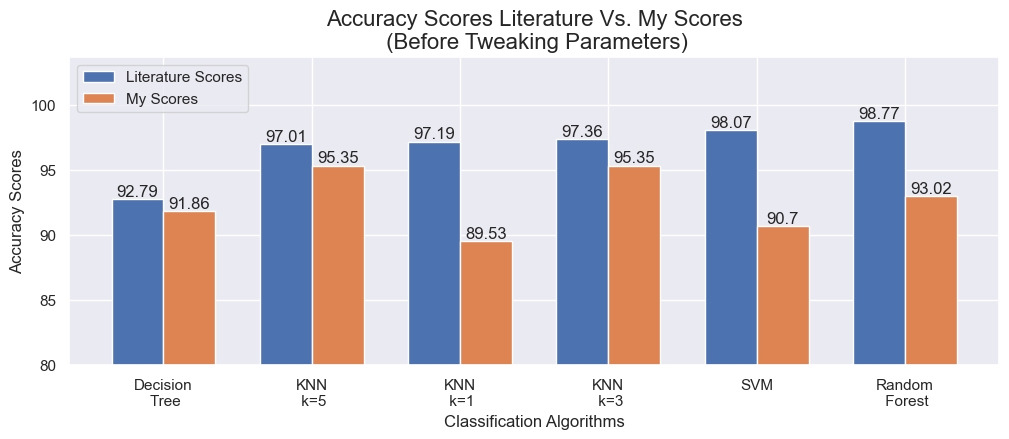

In [180]:
# Plot the probabilities for each sum outcome of 2 dice. 
fig, ax = plt.subplots(figsize=(12,4))

index = np.arange(6)
bar_width = 0.35

fig1 = plt.bar(index, literature_scores, align='edge', width=bar_width, label='Literature Scores')
fig2 = plt.bar(index + bar_width, my_scores, align='edge', width=bar_width, label='My Scores')
plt.legend(loc='upper left')
plt.xticks(np.arange(len(literature_scores)), rotation=0)
plt.ylim(bottom = 80)
ax.set_xticks(index + bar_width)
ax.set_xticklabels(labels)

plt.bar_label(fig1, labels = literature_scores);
plt.bar_label(fig2, labels = my_scores);

ax.set_xlabel("Classification Algorithms")
ax.set_ylabel("Accuracy Scores")
ax.set_title("Accuracy Scores Literature Vs. My Scores\n (Before Tweaking Parameters)", fontsize = 16);

<img src="content/performancebefore.PNG" alt="Performance Before Tweaking Parameters" style="width: 1200px;"/> 

In [105]:
#from sklearn.linear_model import LogisticRegression

from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [88]:
model = RandomForestClassifier()

In [89]:
model.fit(x_train, y_train)

RandomForestClassifier()

In [90]:
predictions = model.predict(x_test)

In [91]:
y_test

421    0
47     1
292    0
186    1
414    1
      ..
335    1
308    0
370    1
403    0
120    0
Name: diagnosis, Length: 86, dtype: int64

In [77]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, predictions, labels=model.classes_)

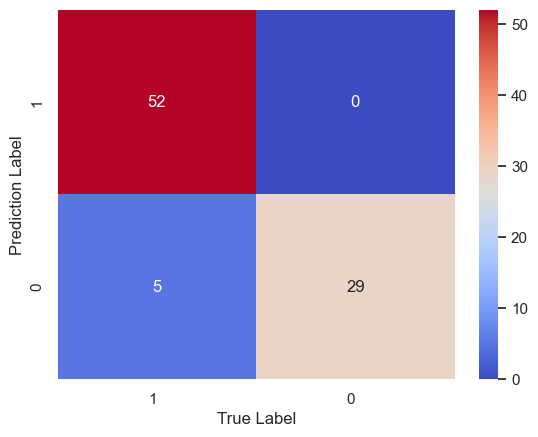

In [78]:
ax = sns.heatmap(cm, annot=True, cmap="coolwarm",)

plt.yticks([1.5, 0.5], ['0', '1'], ha='right')
plt.xticks([1.5, 0.5], ['0', '1'], ha='right')

ax.set(xlabel='True Label', ylabel='Prediction Label');

In [90]:
from sklearn import metrics
accuracy = (metrics.accuracy_score(y_test, predictions) * 100)
precesion = (metrics.precision_score(y_test, predictions) * 100)
recall = (metrics.recall_score(y_test, predictions) * 100)

print(f'Random Forest Model Accuracy: {accuracy:.2f}%')
print(f'Random Forest Model Precision: {precesion:.2f}%')
print(f'Random Forest Model Recall: {recall:.2f}%')

Random Forest Model Accuracy: 94.19%
Random Forest Model Precision: 100.00%
Random Forest Model Recall: 85.29%


Accuracy = Overall number that are correct. <br>
True Positive Rate (TPR), Recall, Sensitivity, probability of detection = [Sum(True Positive)] / [Sum(Conditional Positive)]<br>
Positive Predictive Value (PPV), Precision = [Sum(True Positive)] / [Sum(Predicted Conditional Positive)]

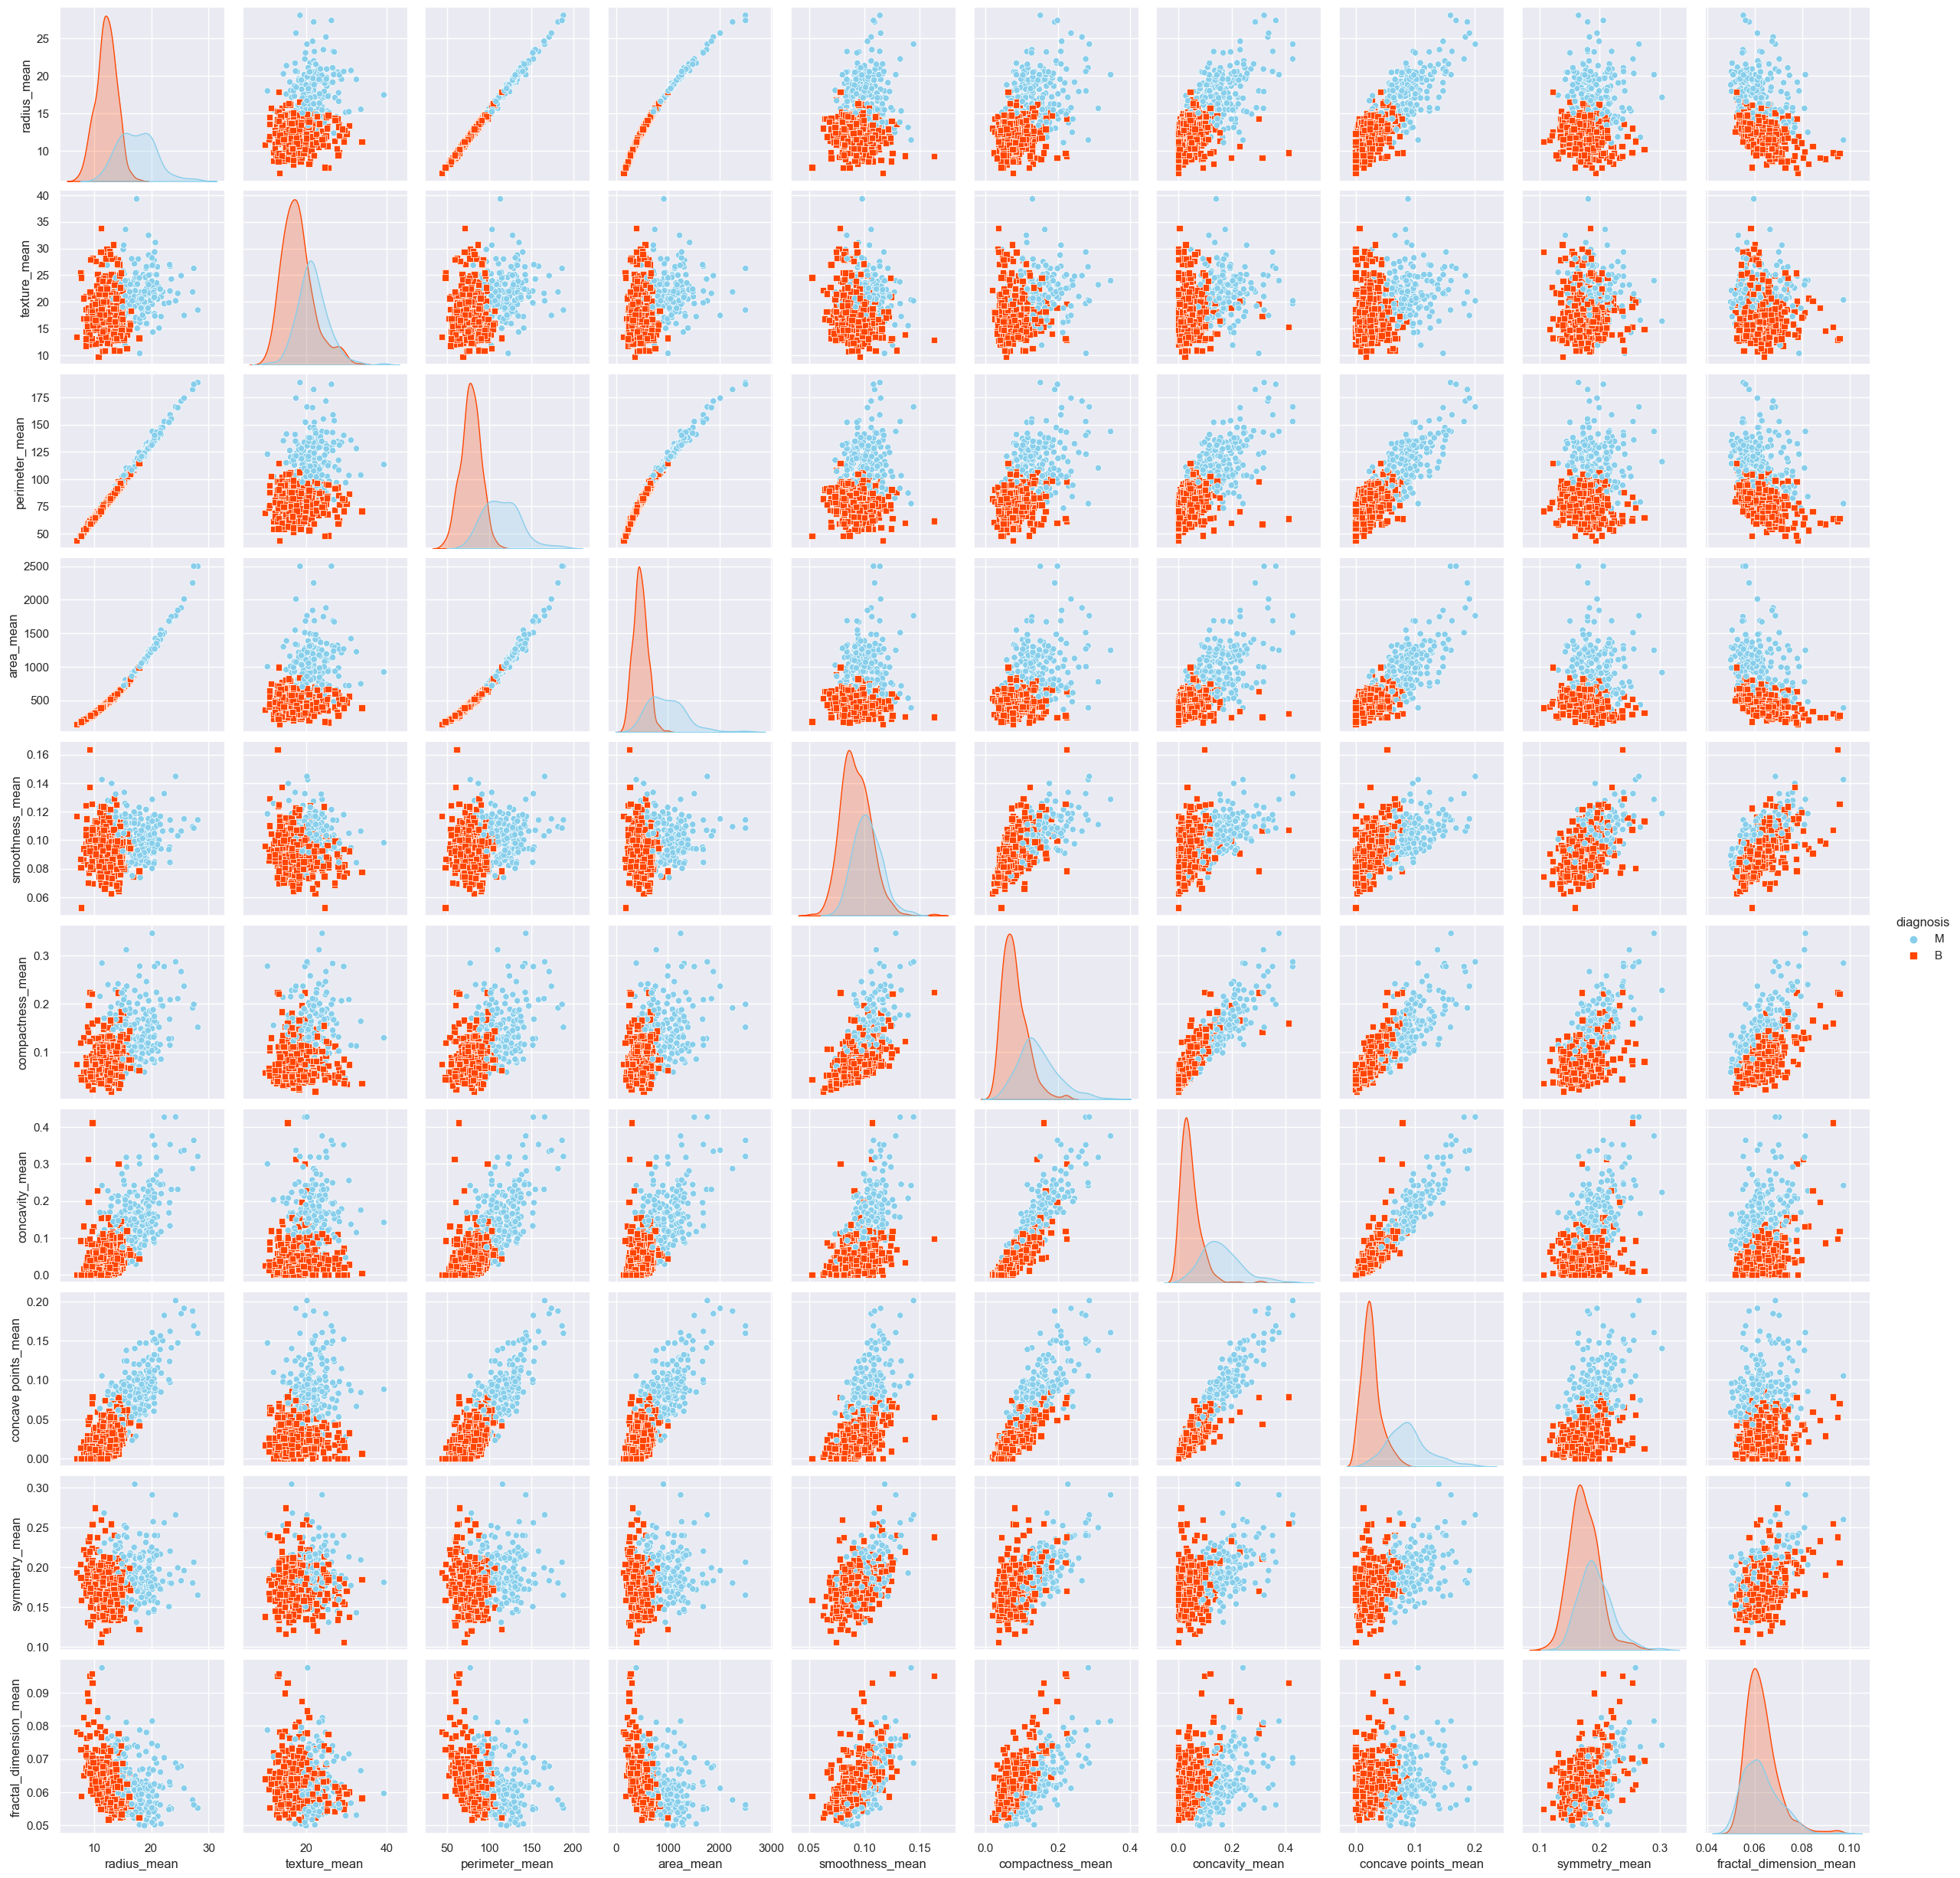

In [28]:
sns.pairplot(mean_features_df, kind="scatter", hue="diagnosis", markers=["o", "s"], palette=diagnosis_cols)

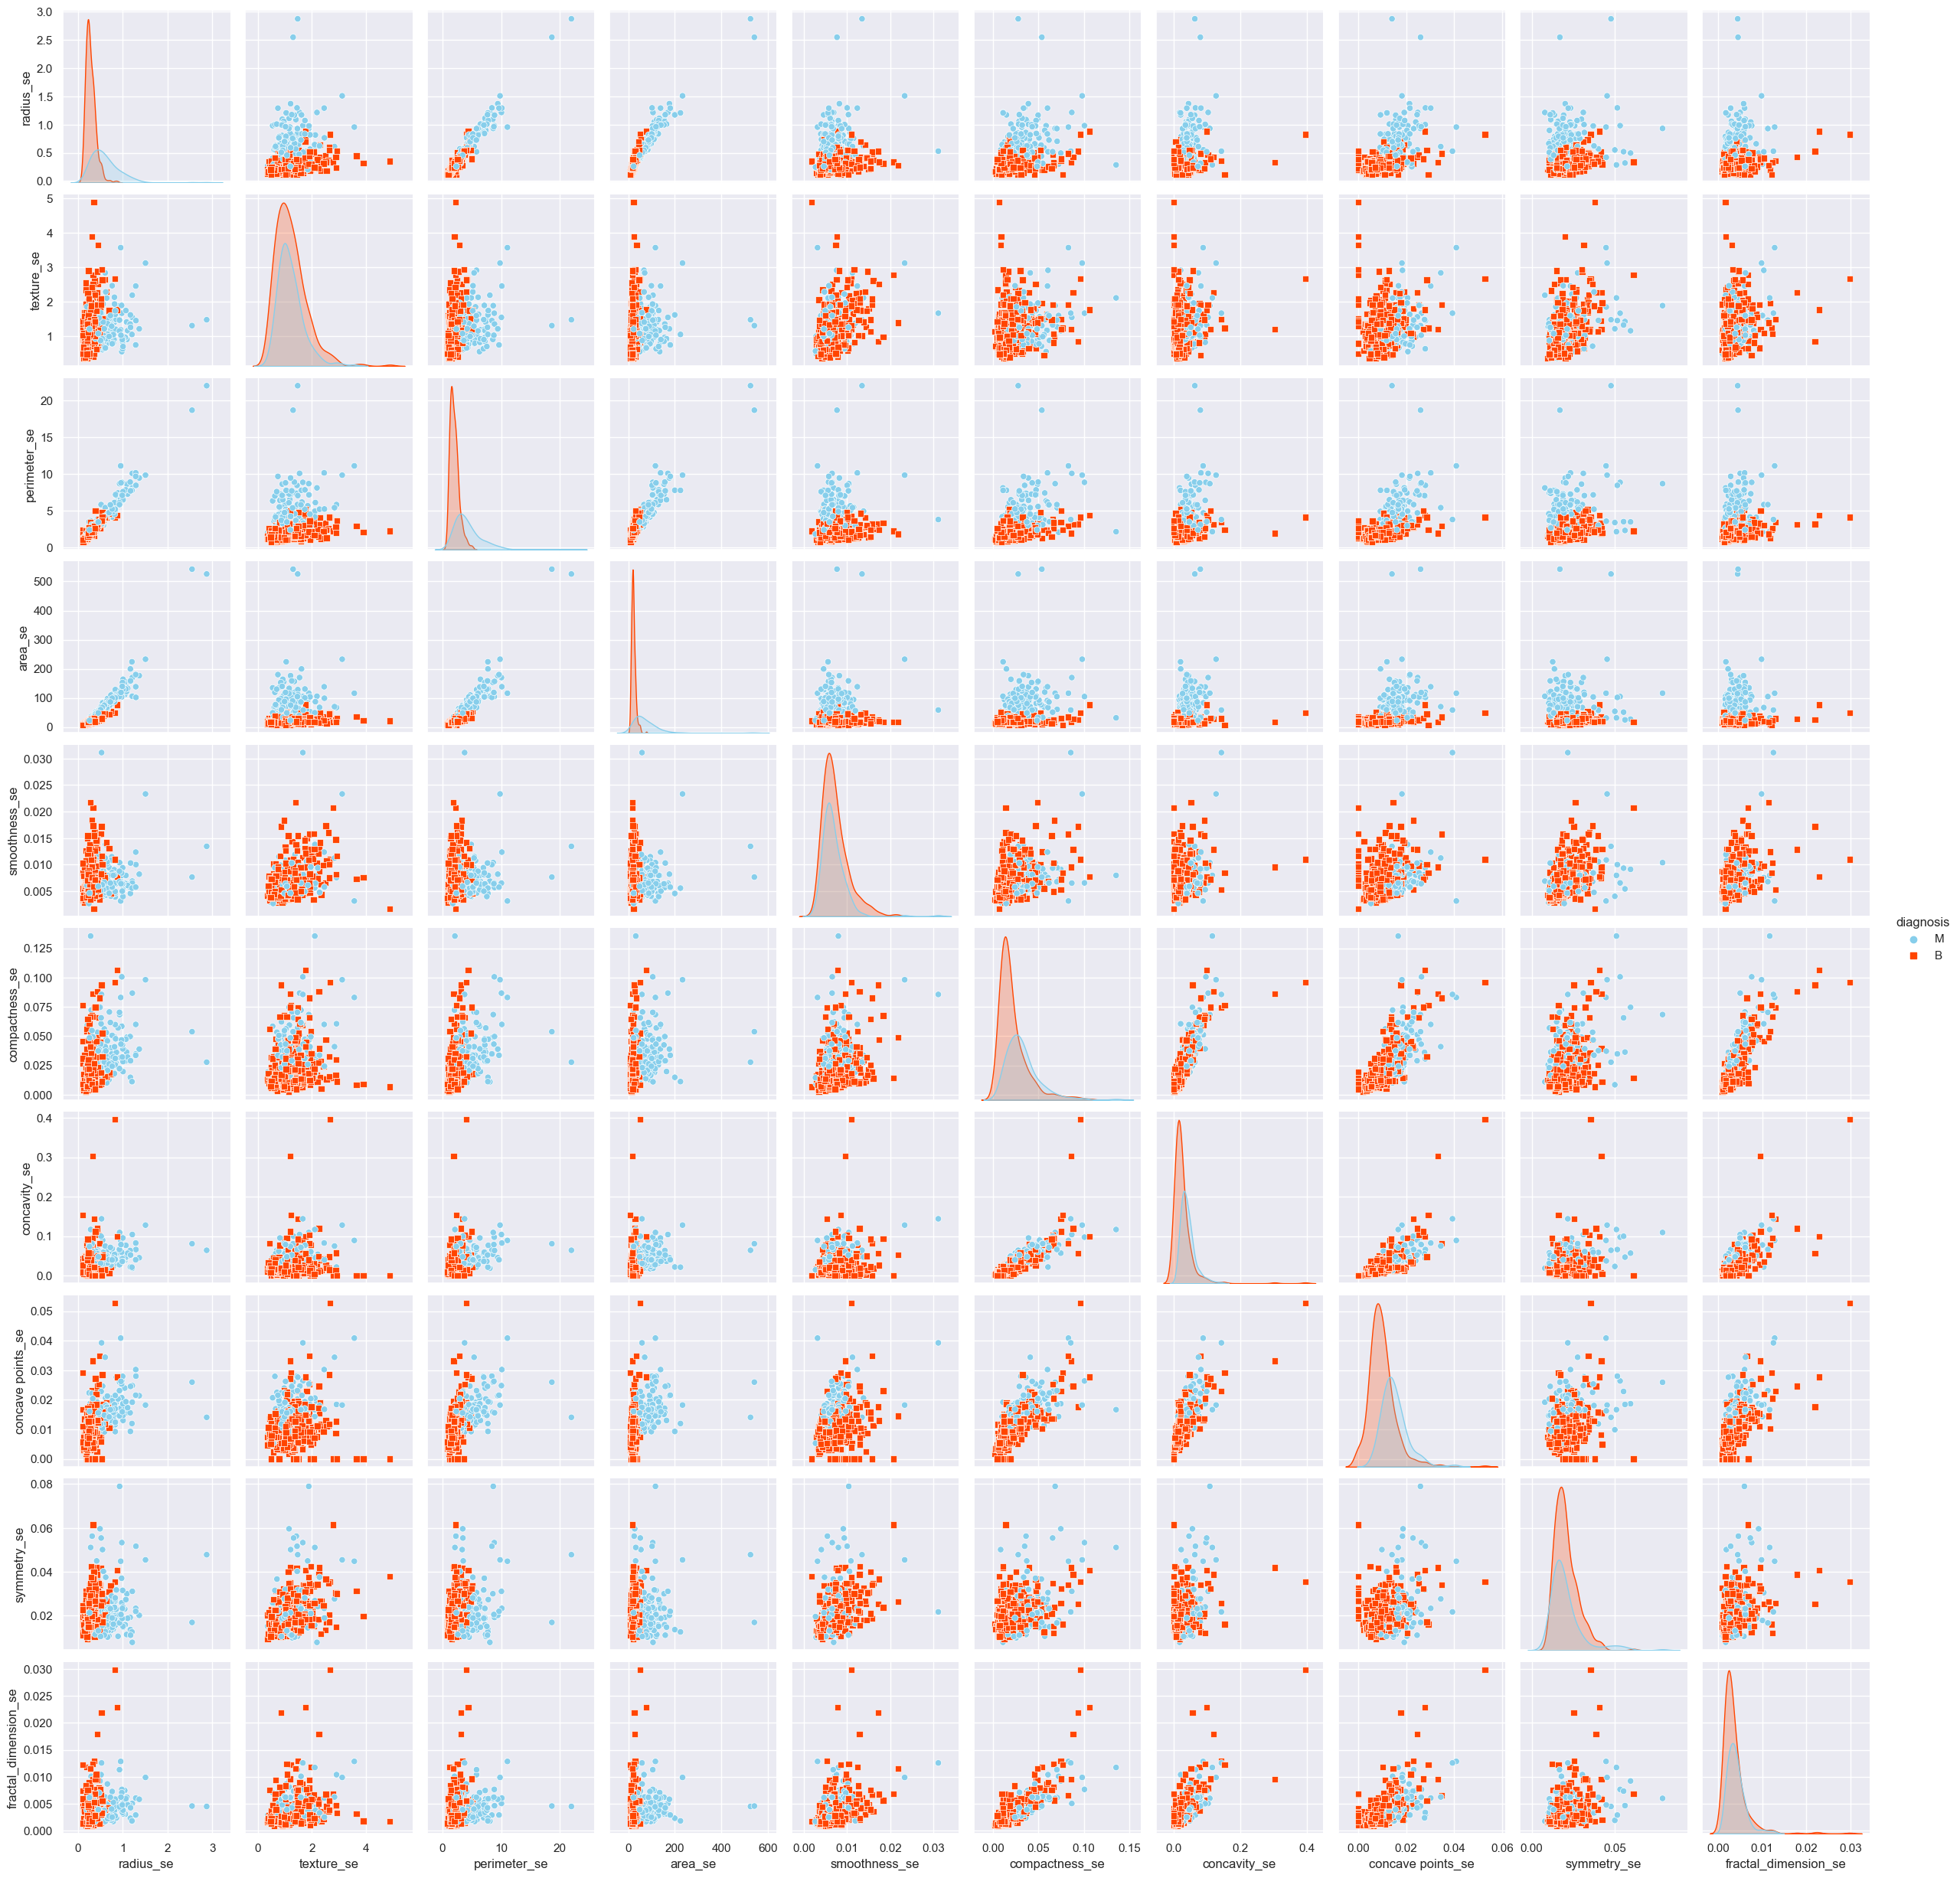

In [29]:
sns.pairplot(se_features_df, kind="scatter", hue="diagnosis", markers=["o", "s"], palette=diagnosis_cols)

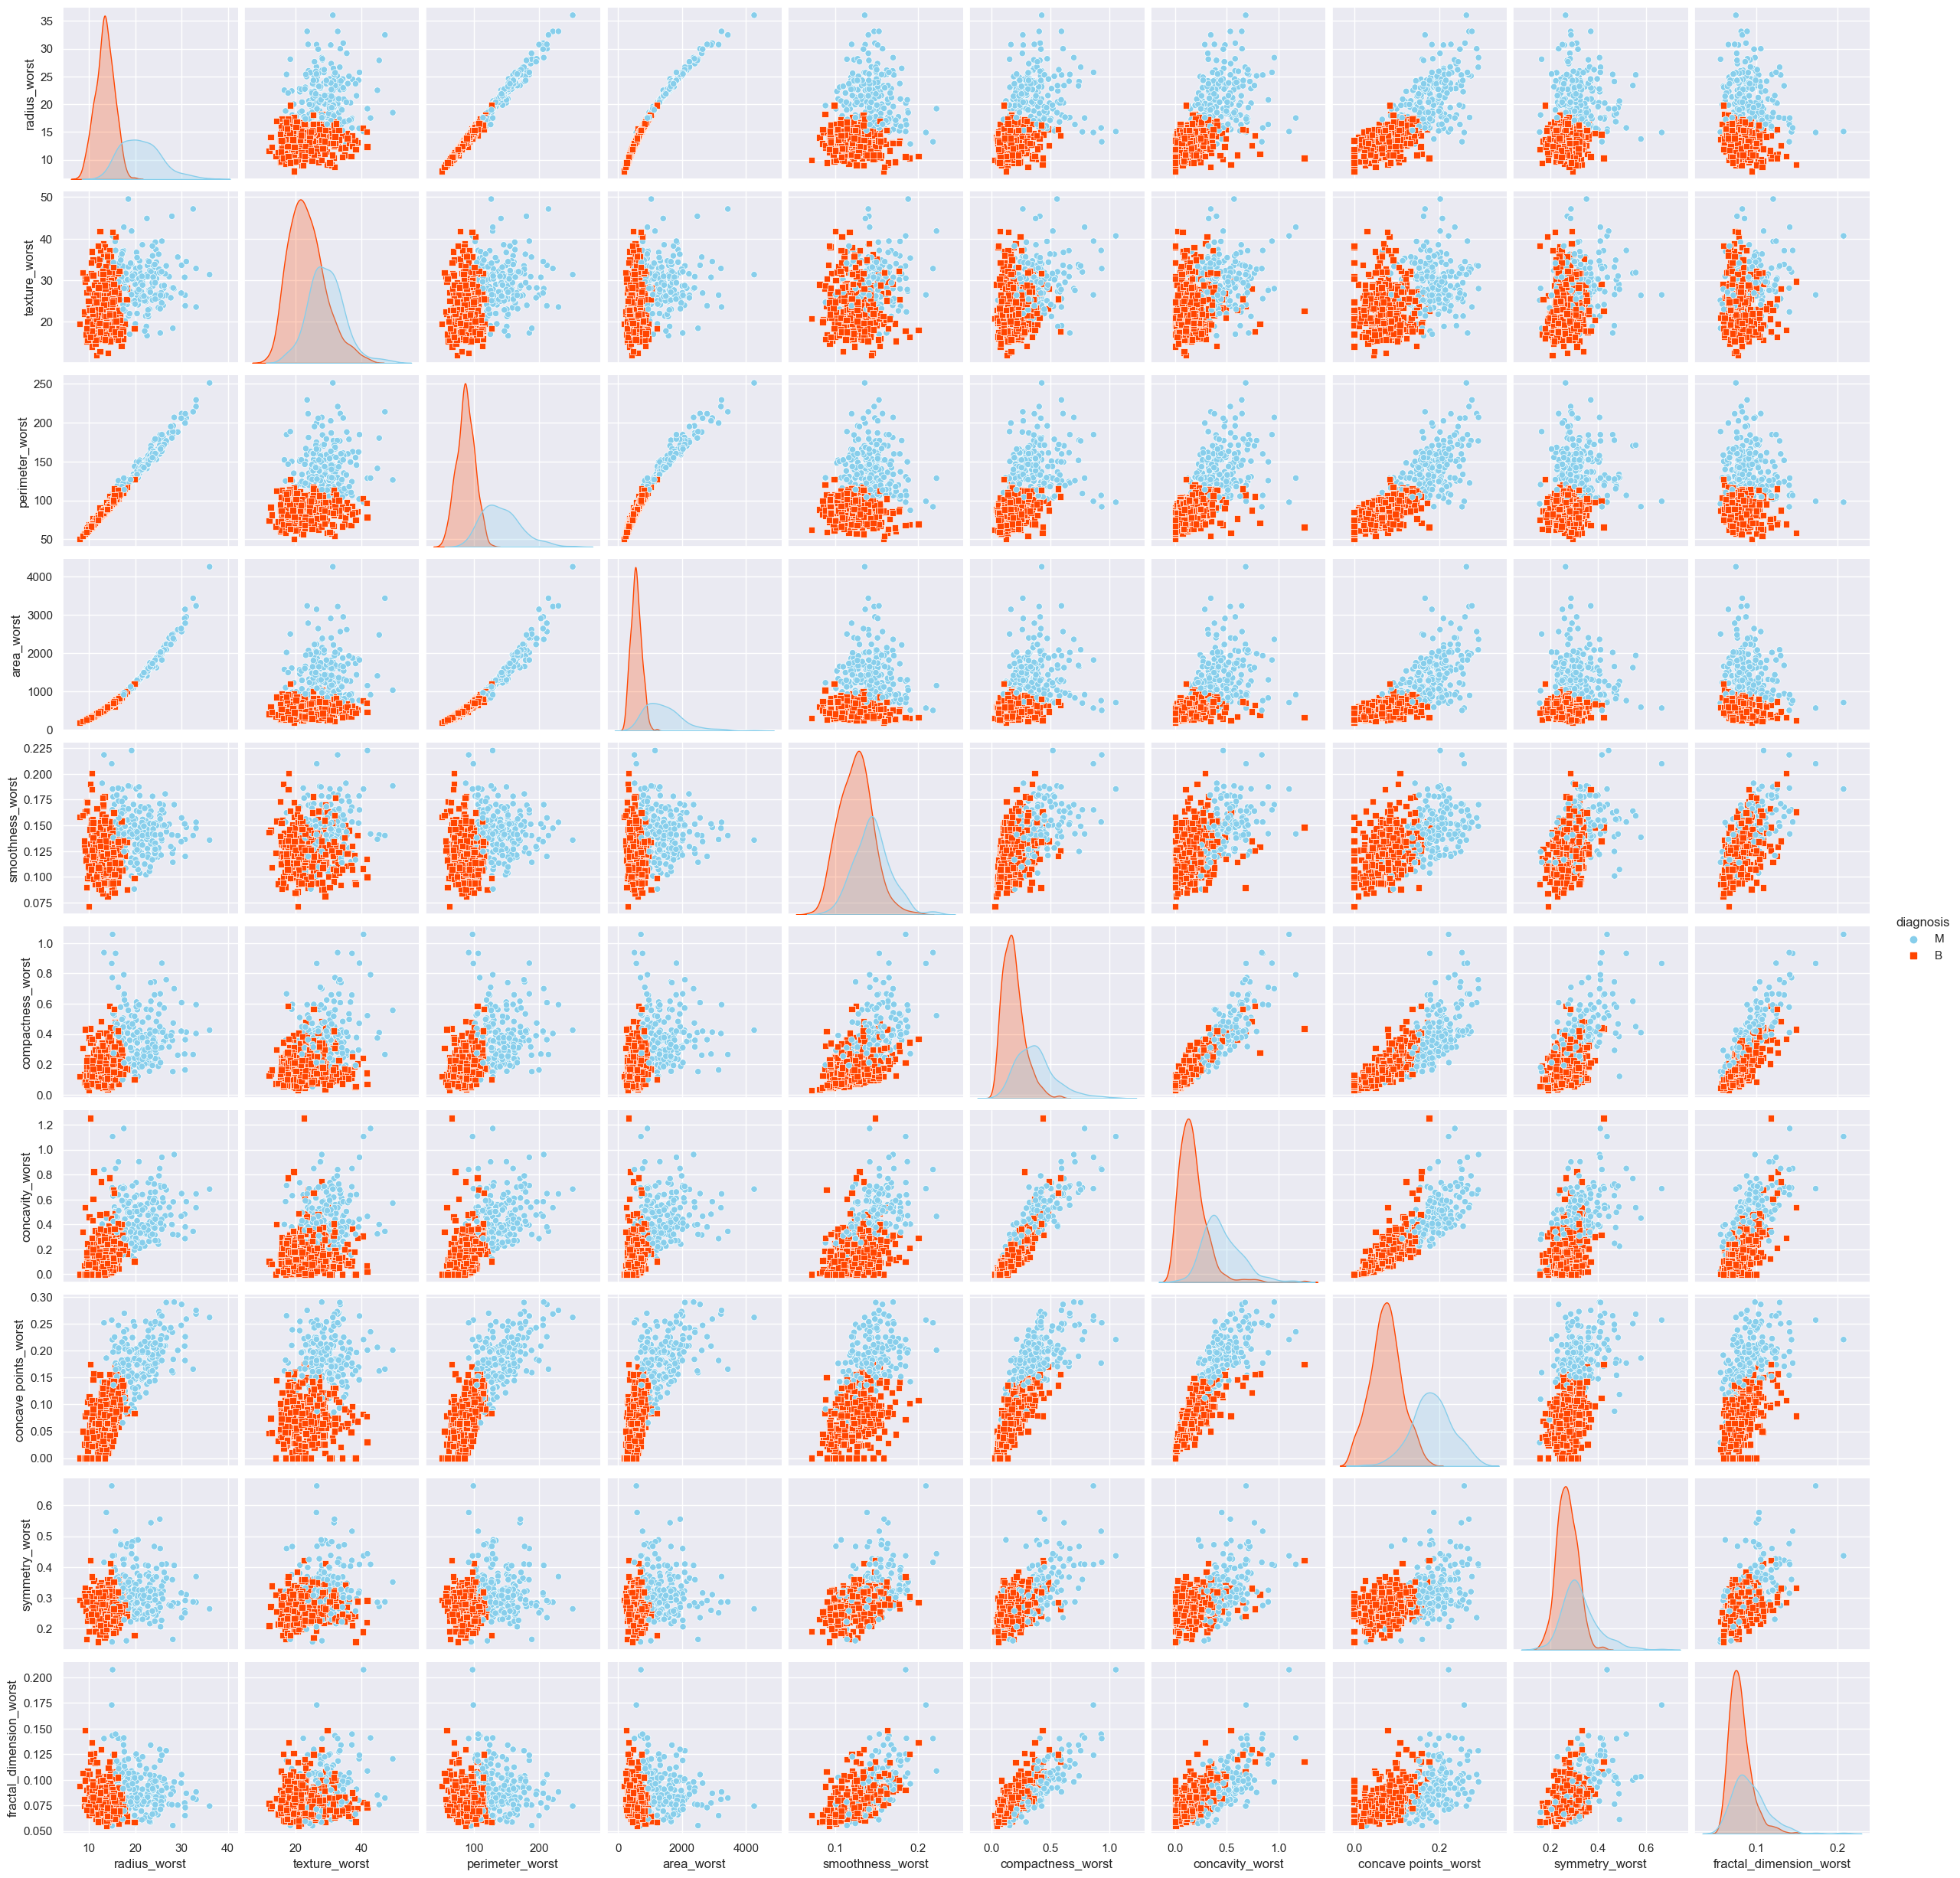

In [30]:
sns.pairplot(worst_features_df, kind="scatter", hue="diagnosis", markers=["o", "s"], palette=diagnosis_cols)